# 21BDS0379

# SHREYASHA SHRESTHA

# EDA THEORY- D1

## Digital Assignment 1

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Load dataset
df = pd.read_csv('MyDataset_EDA.csv')

In [18]:
# Display basic info
df.info()
print("\nSummary Statistics:")
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         393 non-null    object
 2   age         395 non-null    int64 
 3   address     394 non-null    object
 4   famsize     394 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   393 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [19]:
# Handling missing values
df['sex'].fillna(df['sex'].mode()[0], inplace=True)
df['address'].fillna(df['address'].mode()[0], inplace=True)
df['famsize'].fillna(df['famsize'].mode()[0], inplace=True)
df['schoolsup'].fillna(df['schoolsup'].mode()[0], inplace=True)

<ipython-input-19-f698c8d2acdd>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sex'].fillna(df['sex'].mode()[0], inplace=True)
<ipython-input-19-f698c8d2acdd>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [20]:
# Remove duplicate rows
df = df.drop_duplicates()

In [21]:
# Convert data types if needed
def convert_dtype(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            try:
                df[col] = pd.to_datetime(df[col])  # Convert date-like columns
            except:
                pass  # If conversion fails, leave as object
        elif df[col].dtype in ['int64', 'float64']:
            df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert numeric values
    return df

df = convert_dtype(df)

<ipython-input-21-369a7d50bdcc>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])  # Convert date-like columns
<ipython-input-21-369a7d50bdcc>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])  # Convert date-like columns
<ipython-input-21-369a7d50bdcc>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])  # Convert date-like columns
<ipython-input-21-369a7d50bdcc>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To 

In [22]:
# Handling outliers (Removing values beyond 1.5*IQR)
def remove_outliers(df):
    for col in ['absences']:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df = remove_outliers(df)

In [23]:
# Encoding categorical variables
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category').cat.codes


Univariate Analysis

In [24]:
# Central Tendency Measures
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    print(f"\n{col}:")
    print(f"Mean: {df[col].mean()}")
    print(f"Median: {df[col].median()}")
    print(f"Mode: {df[col].mode()[0]}")

# Dispersion Measures
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    print(f"\n{col}:")
    print(f"Range: {df[col].max() - df[col].min()}")
    print(f"Variance: {df[col].var()}")
    print(f"Standard Deviation: {df[col].std()}")
    print(f"Min: {df[col].min()}")
    print(f"Max: {df[col].max()}")
    print(f"Q1: {df[col].quantile(0.25)}")
    print(f"Q3: {df[col].quantile(0.75)}")
    print(f"IQR: {df[col].quantile(0.75) - df[col].quantile(0.25)}")



age:
Mean: 16.67105263157895
Median: 17.0
Mode: 16

Medu:
Mean: 2.7263157894736842
Median: 3.0
Mode: 4

Fedu:
Mean: 2.5078947368421054
Median: 2.0
Mode: 2

traveltime:
Mean: 1.444736842105263
Median: 1.0
Mode: 1

studytime:
Mean: 2.042105263157895
Median: 2.0
Mode: 2

failures:
Mean: 0.3263157894736842
Median: 0.0
Mode: 0

famrel:
Mean: 3.9473684210526314
Median: 4.0
Mode: 4

freetime:
Mean: 3.2605263157894737
Median: 3.0
Mode: 3

goout:
Mean: 3.107894736842105
Median: 3.0
Mode: 3

Dalc:
Mean: 1.481578947368421
Median: 1.0
Mode: 1

Walc:
Mean: 2.278947368421053
Median: 2.0
Mode: 1

health:
Mean: 3.5710526315789473
Median: 4.0
Mode: 5

absences:
Mean: 4.602631578947369
Median: 3.0
Mode: 0

G1:
Mean: 10.921052631578947
Median: 11.0
Mode: 10

G2:
Mean: 10.723684210526315
Median: 11.0
Mode: 9

G3:
Mean: 10.421052631578947
Median: 11.0
Mode: 10

age:
Range: 7
Variance: 1.625017358700184
Standard Deviation: 1.2747616870223955
Min: 15
Max: 22
Q1: 16.0
Q3: 18.0
IQR: 2.0

Medu:
Range: 4
Varian

<ipython-input-37-c8f26cb134f5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[cat_col].astype(str), palette='coolwarm')


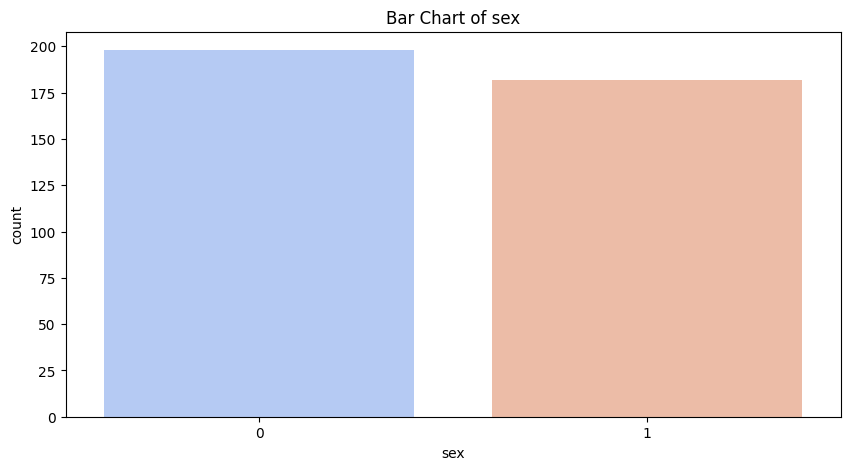

<ipython-input-37-c8f26cb134f5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[cat_col].astype(str), palette='coolwarm')


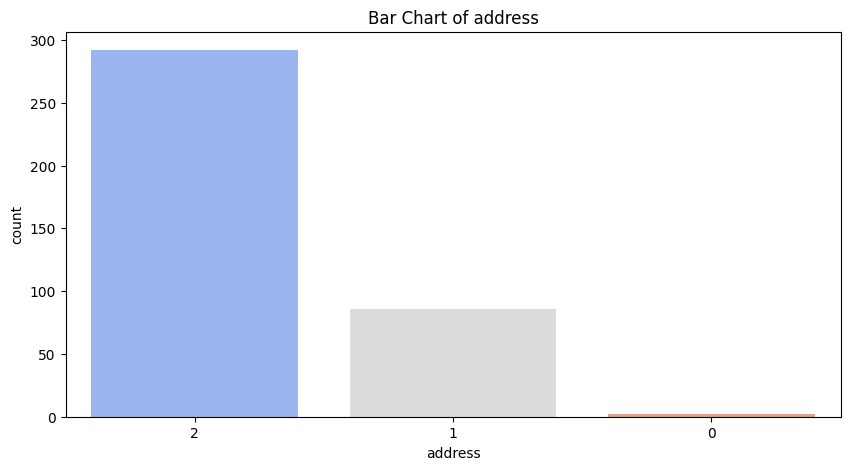

<ipython-input-37-c8f26cb134f5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[cat_col].astype(str), palette='coolwarm')


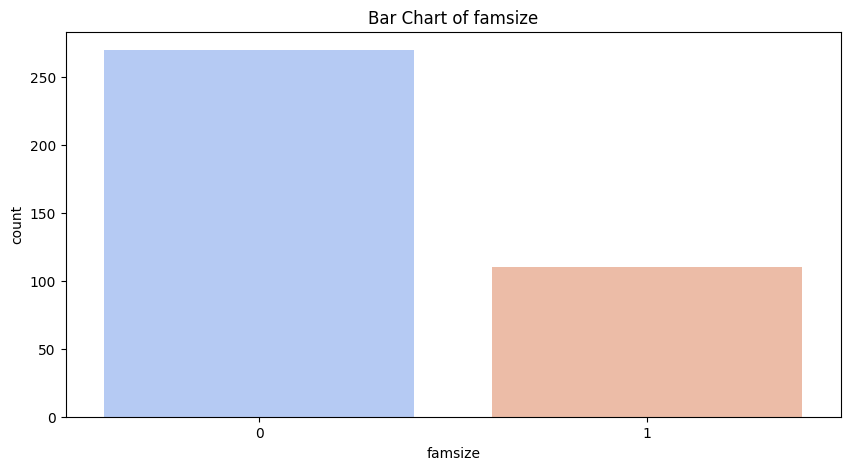

<ipython-input-37-c8f26cb134f5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[cat_col].astype(str), palette='coolwarm')


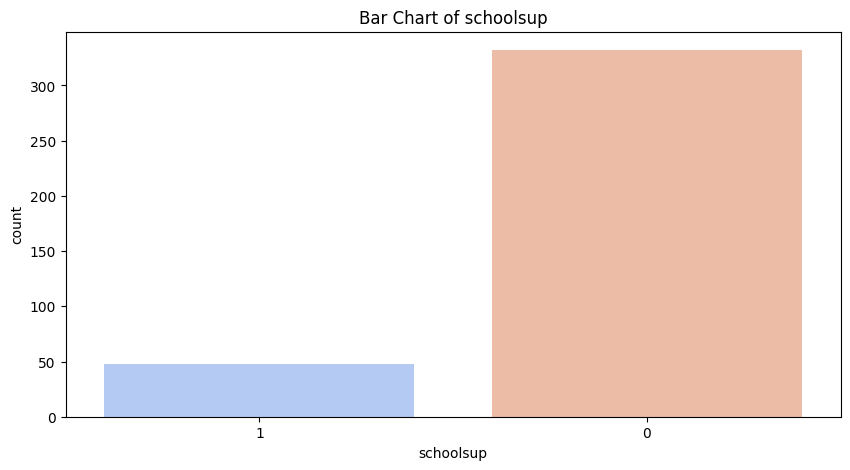

Column 'age_group' not found in DataFrame, skipping.


In [37]:
categorical_cols = ['sex', 'address', 'famsize', 'schoolsup', 'age_group']
for cat_col in categorical_cols:
    if cat_col in df.columns:
        plt.figure(figsize=(10,5))
        sns.countplot(x=df[cat_col].astype(str), palette='coolwarm')
        plt.title(f'Bar Chart of {cat_col}')
        plt.show()
    else:
        print(f"Column '{cat_col}' not found in DataFrame, skipping.")


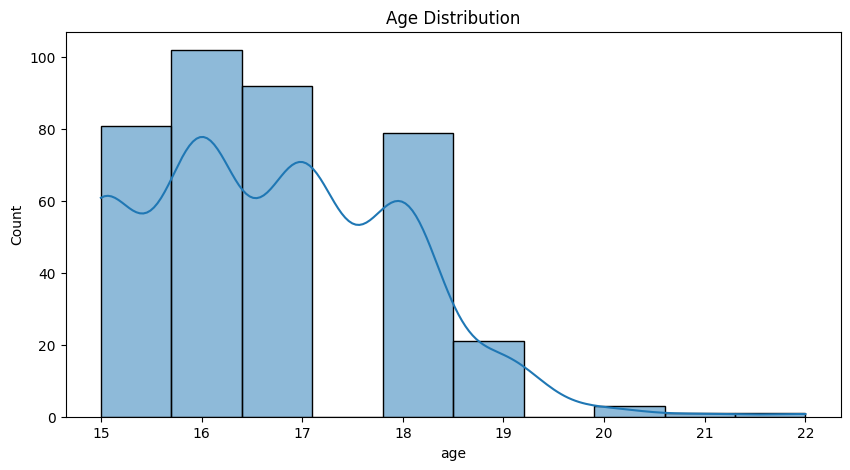

In [28]:
plt.figure(figsize=(10,5))
sns.histplot(df['age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.show()

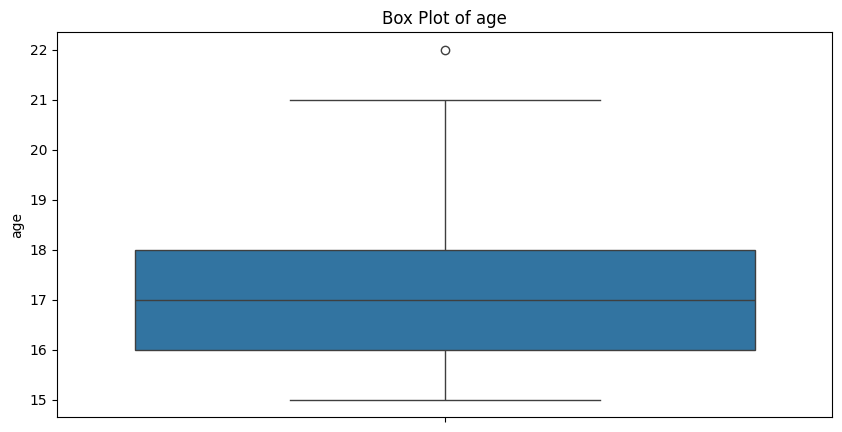

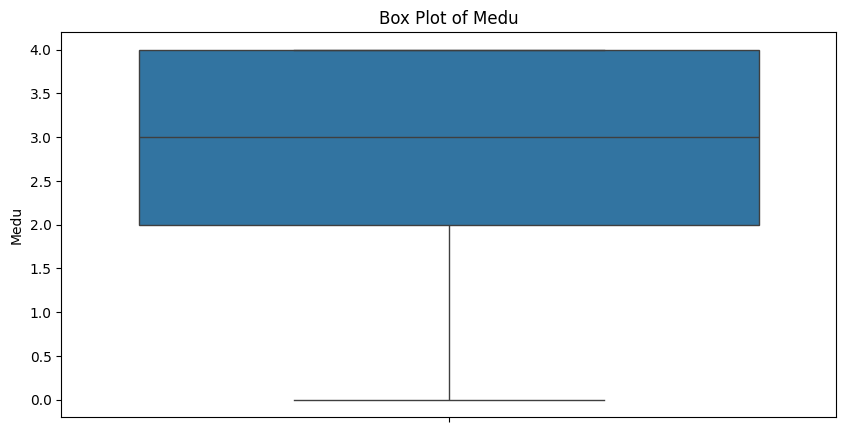

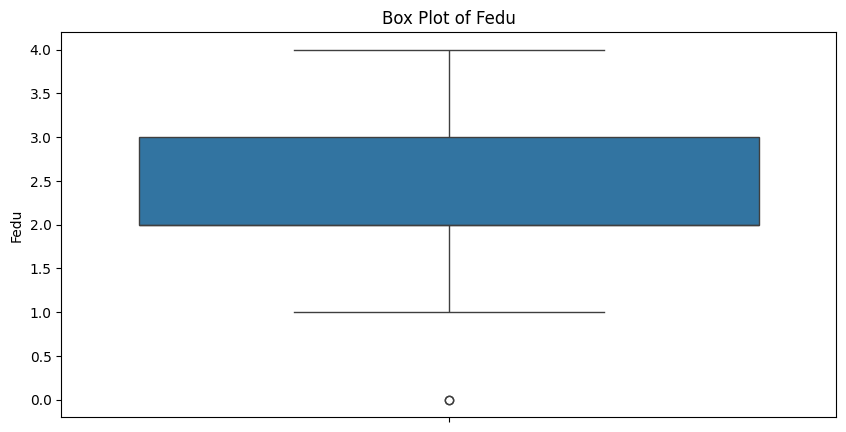

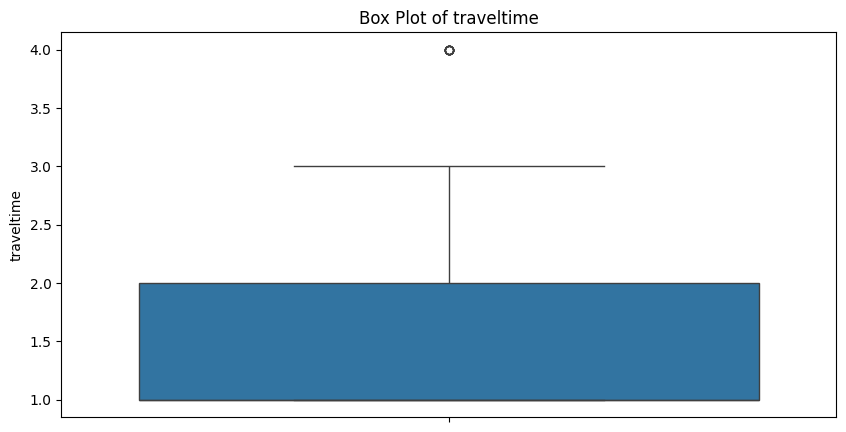

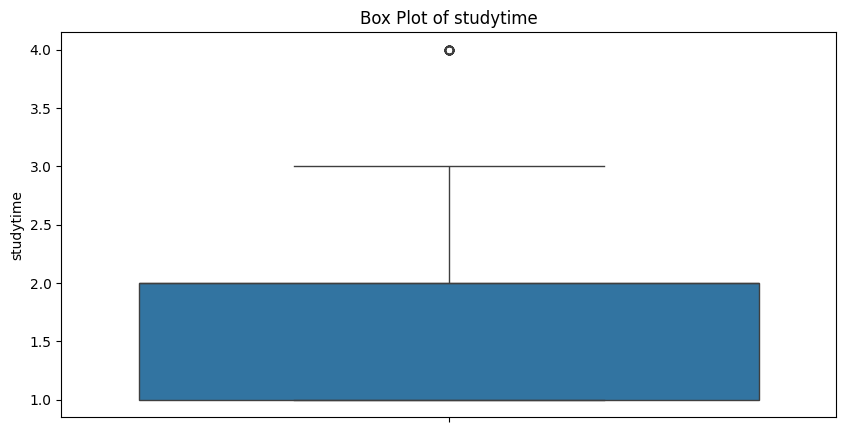

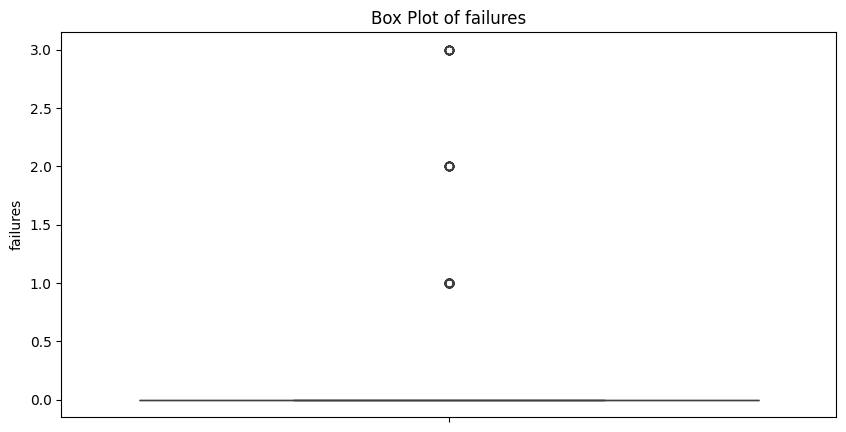

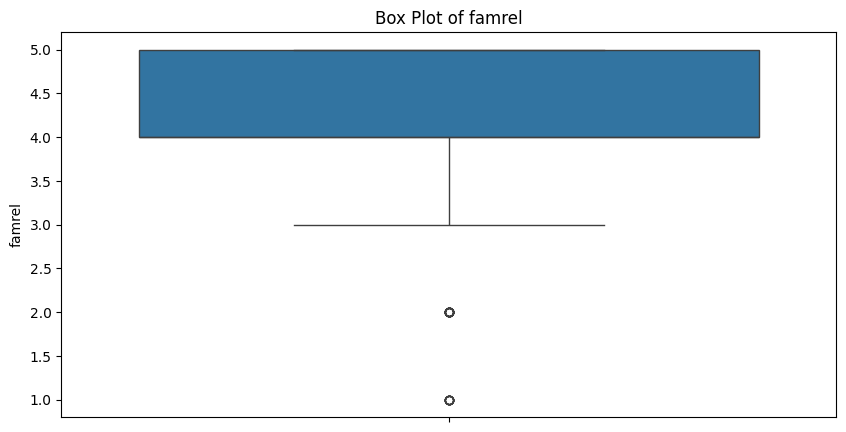

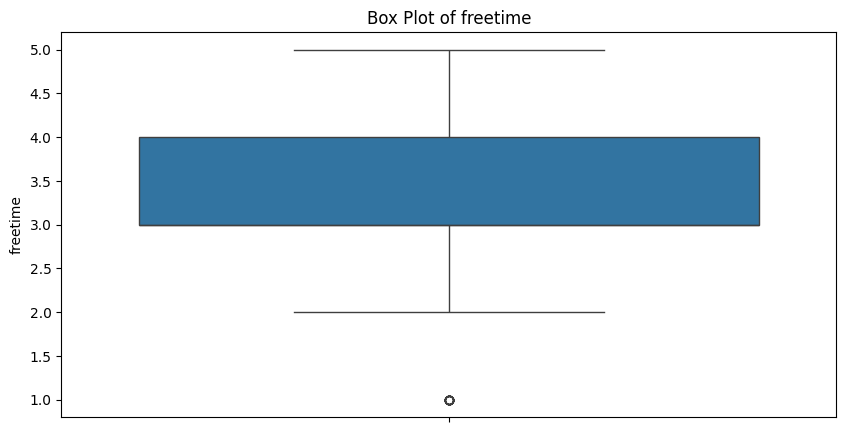

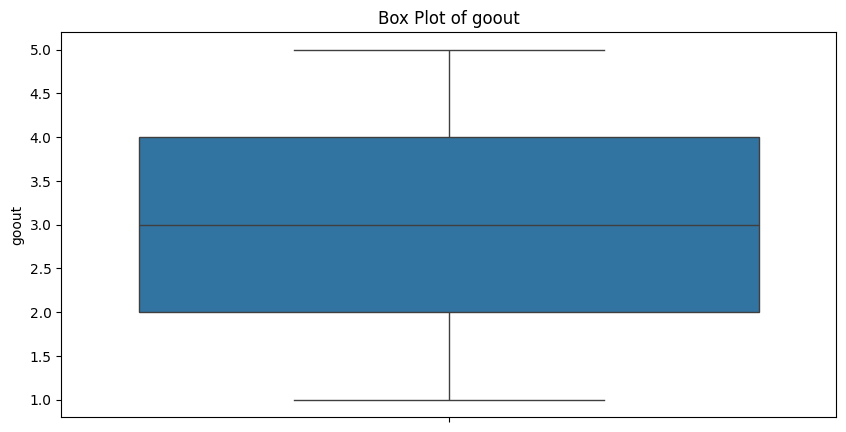

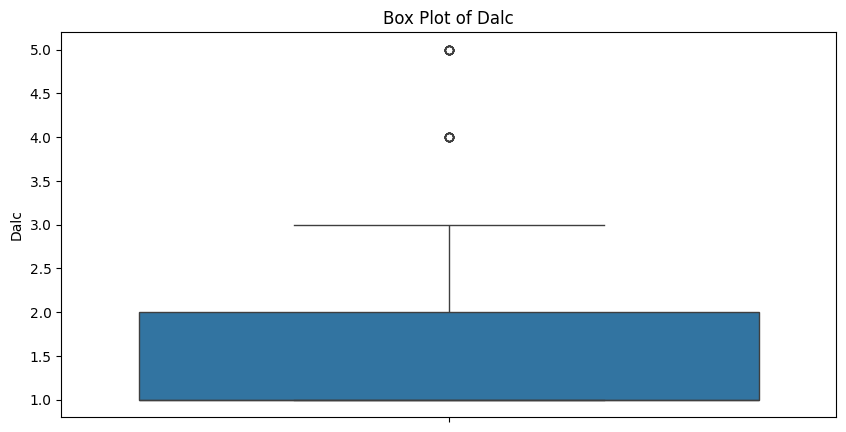

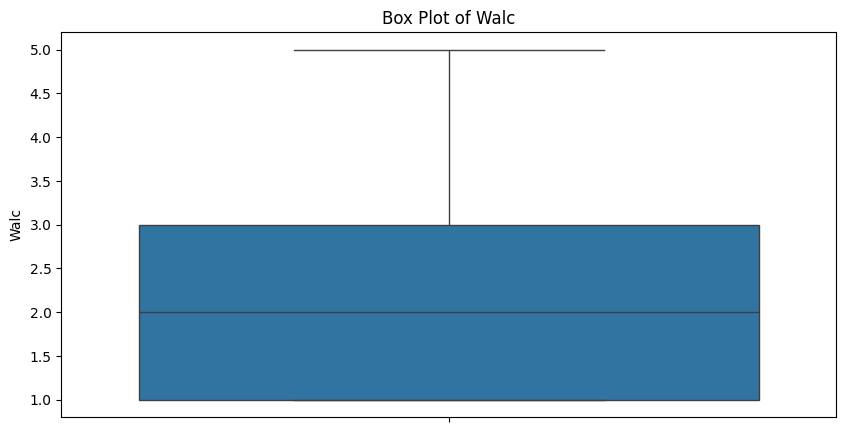

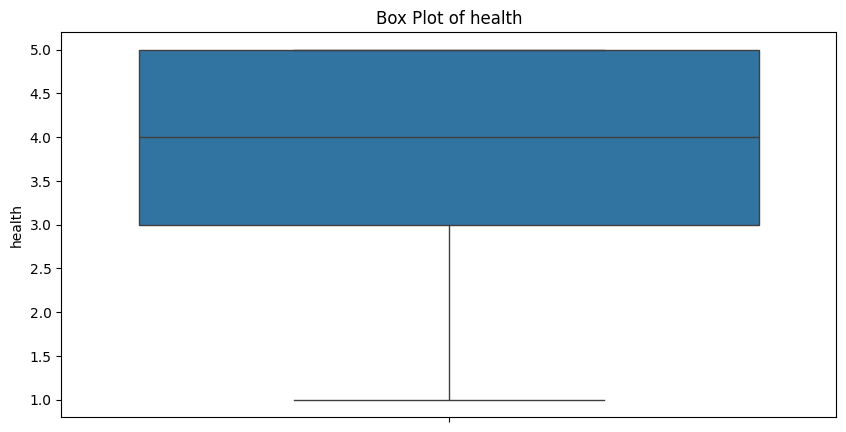

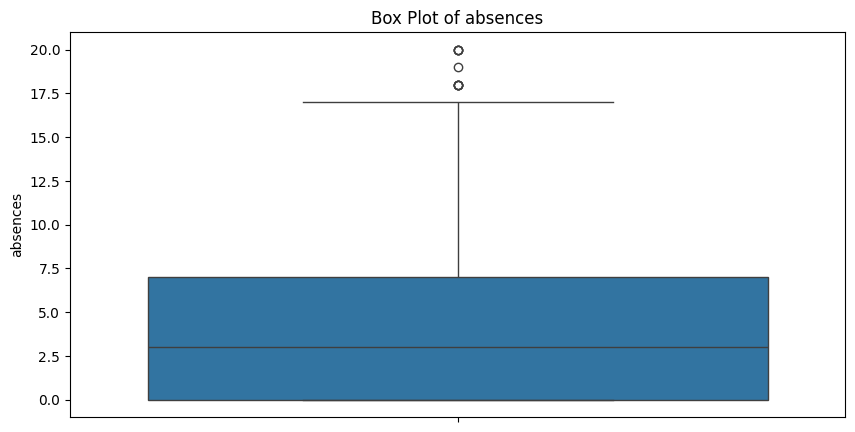

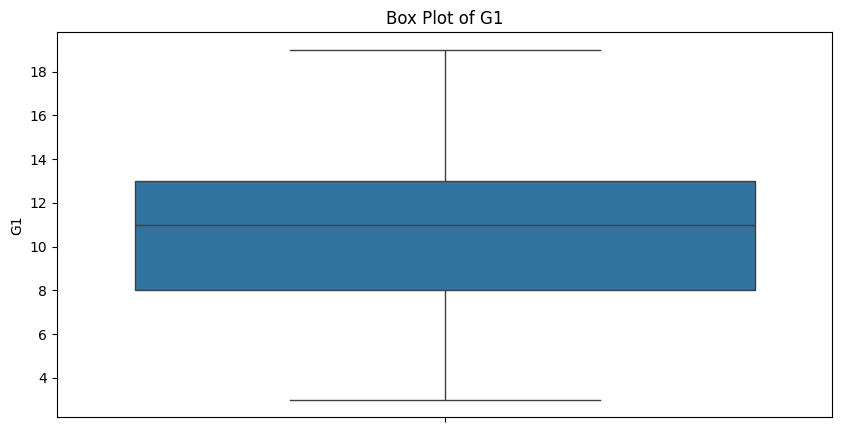

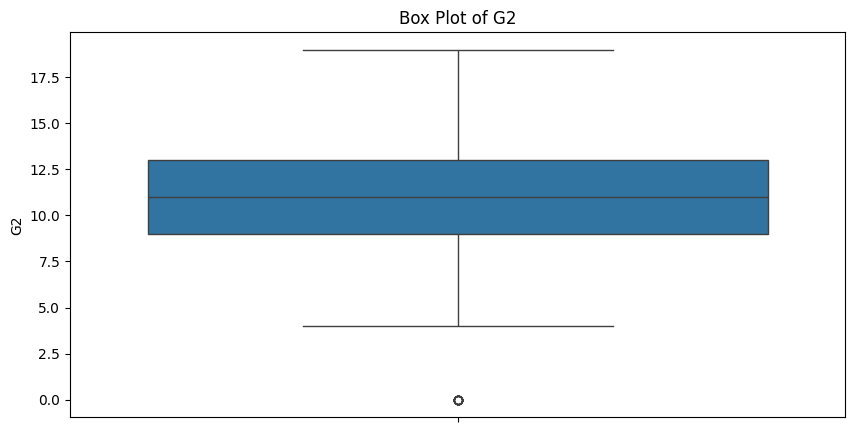

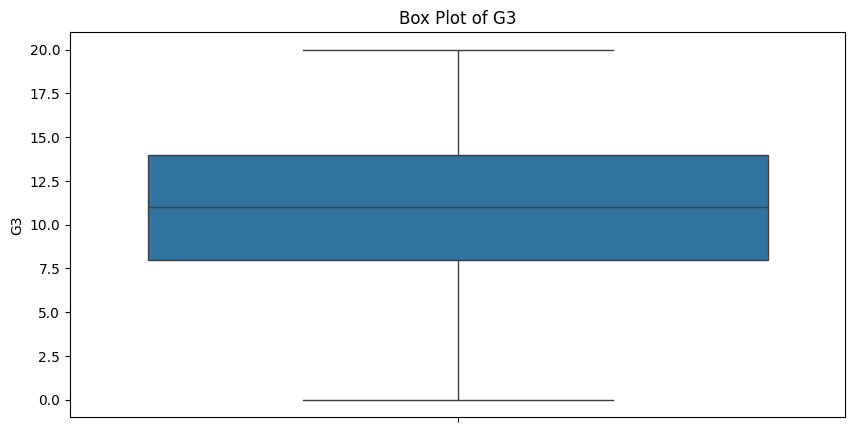

In [29]:
# Box plot for numeric columns
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10,5))
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

Bivariate Analysis

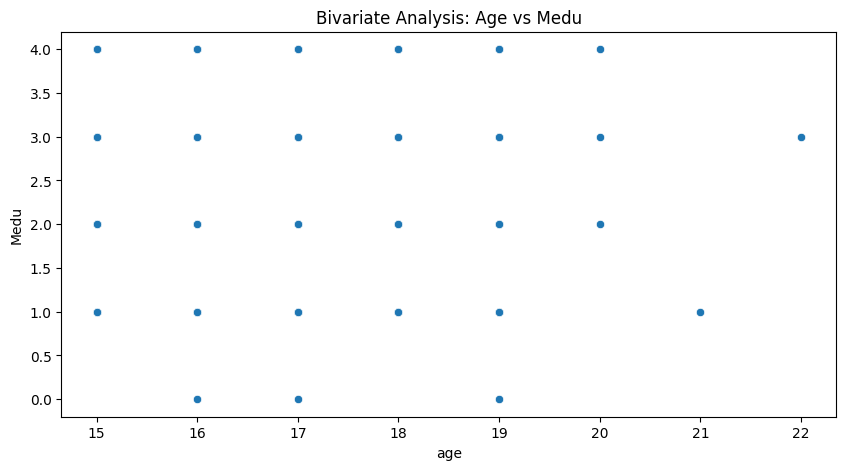

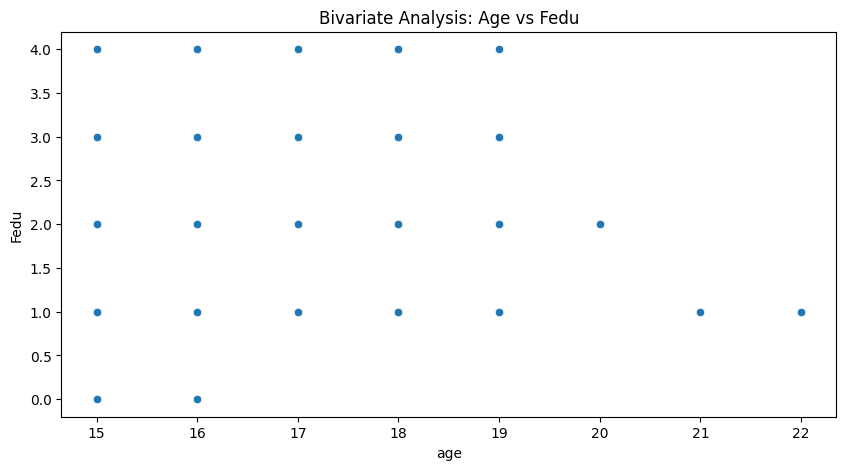

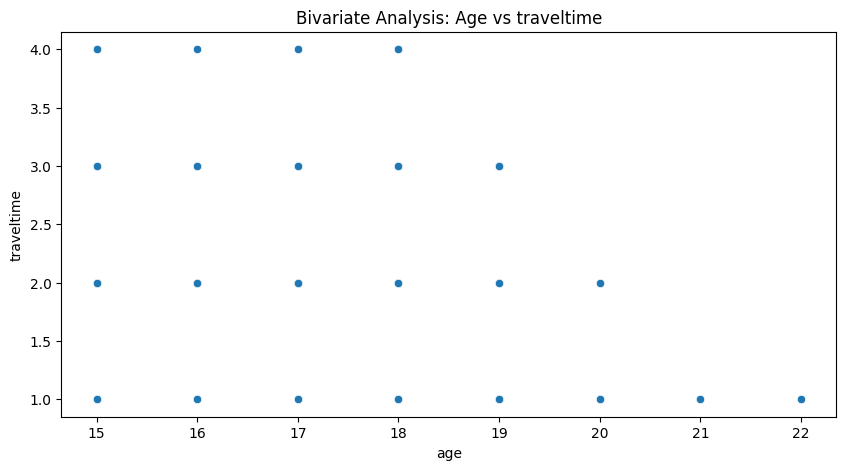

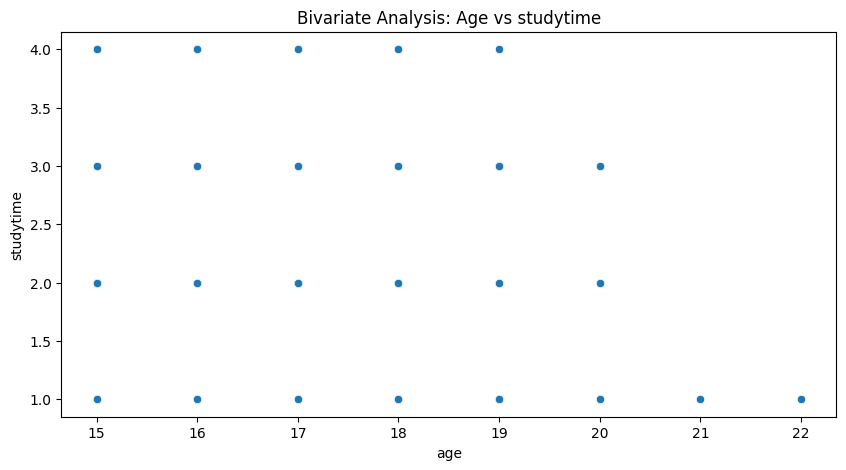

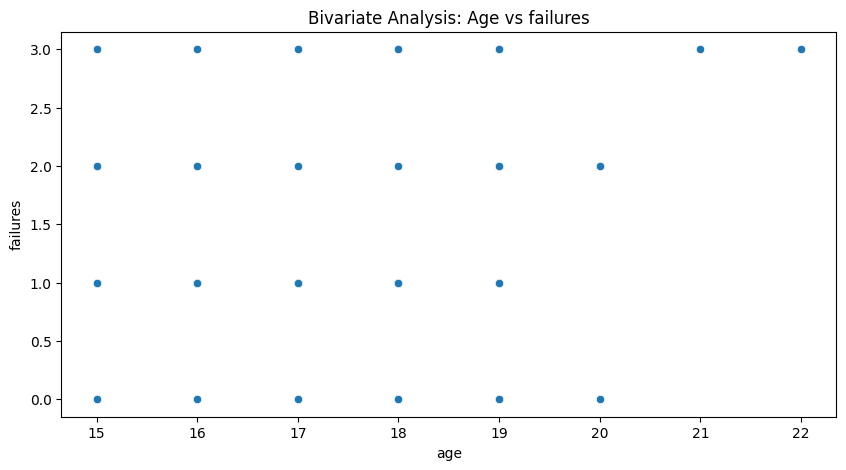

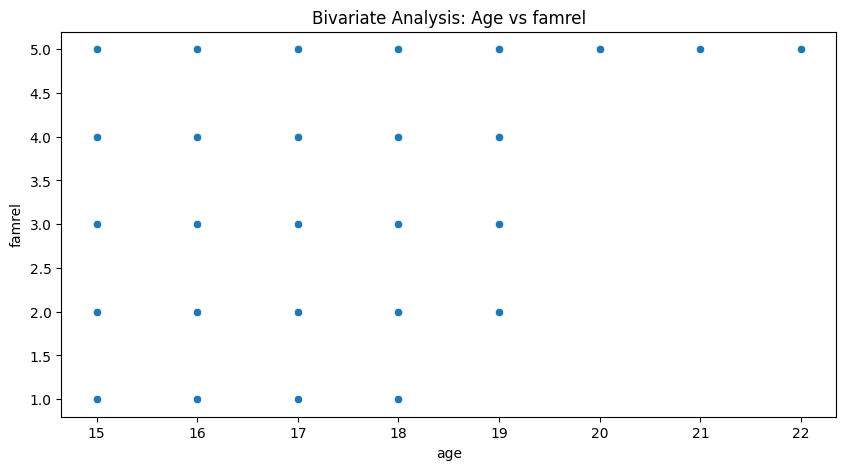

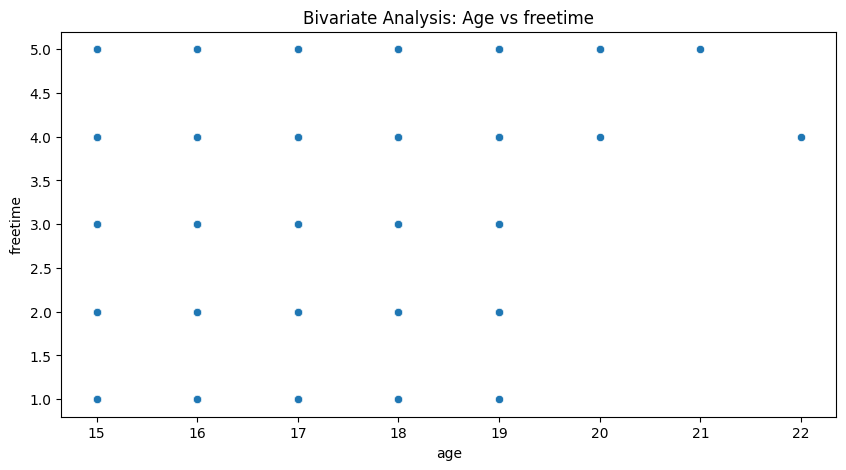

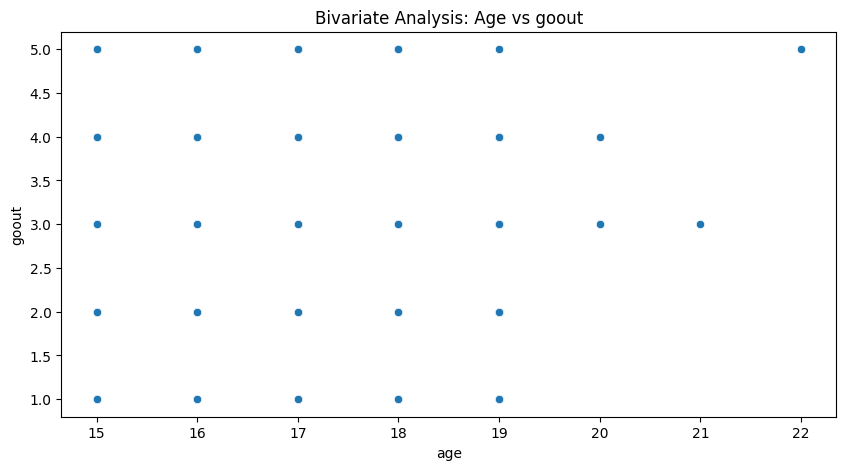

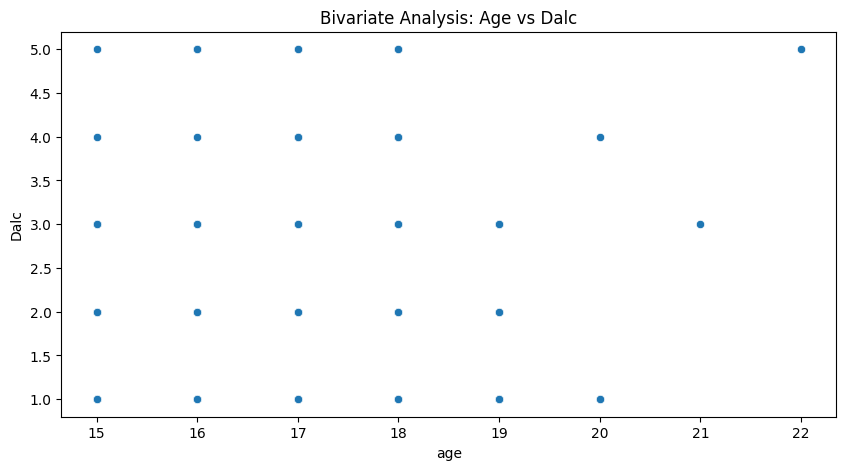

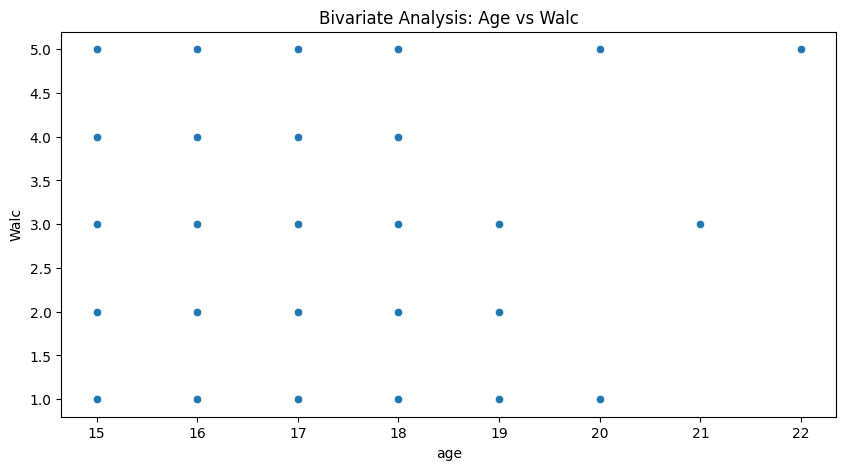

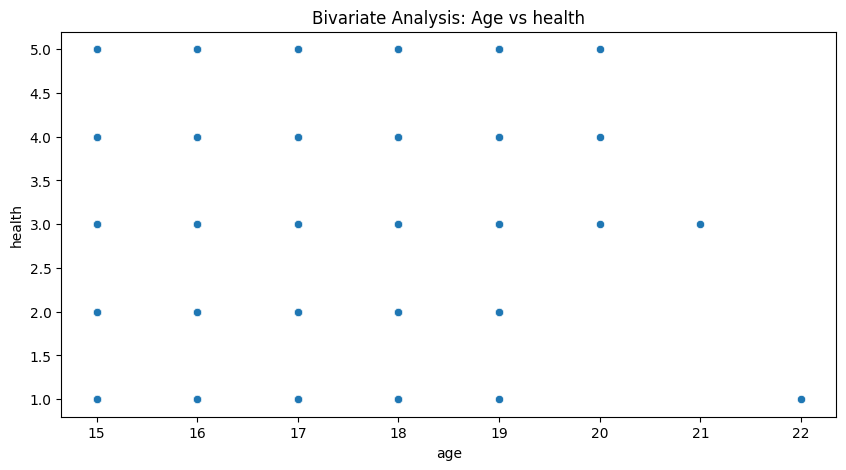

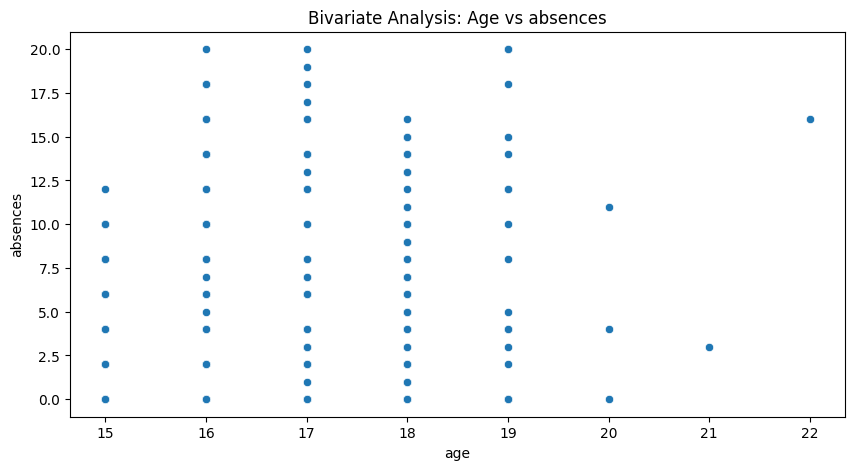

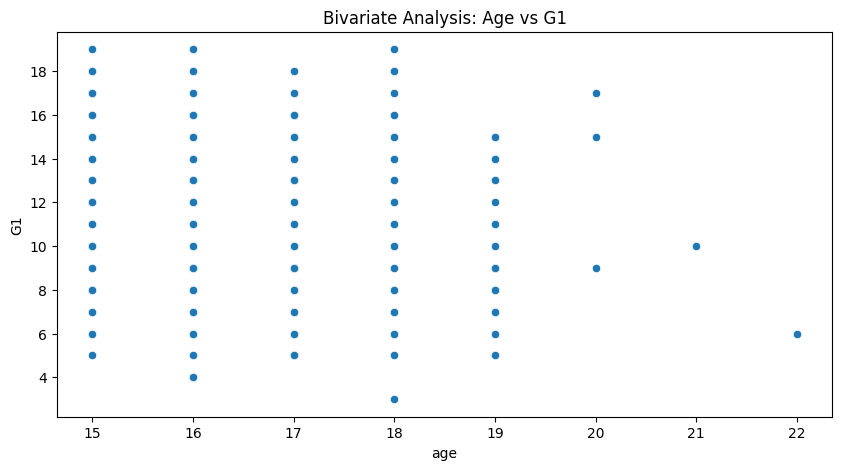

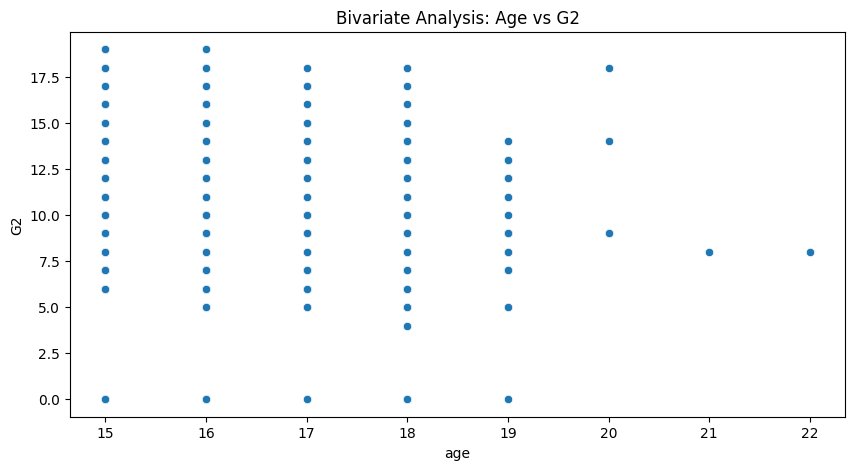

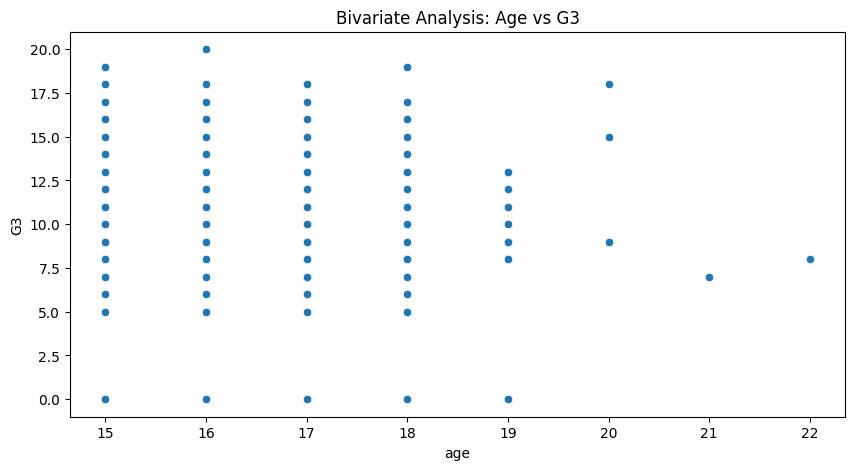

In [30]:
#Bivariate Analysis
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    if col != 'age':  # Avoid redundant comparison
        plt.figure(figsize=(10,5))
        sns.scatterplot(x=df['age'], y=df[col])
        plt.title(f'Bivariate Analysis: Age vs {col}')
        plt.show()


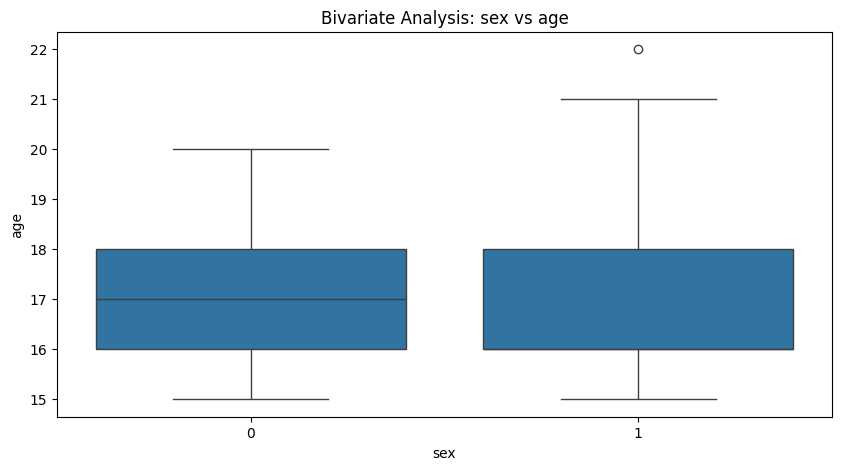

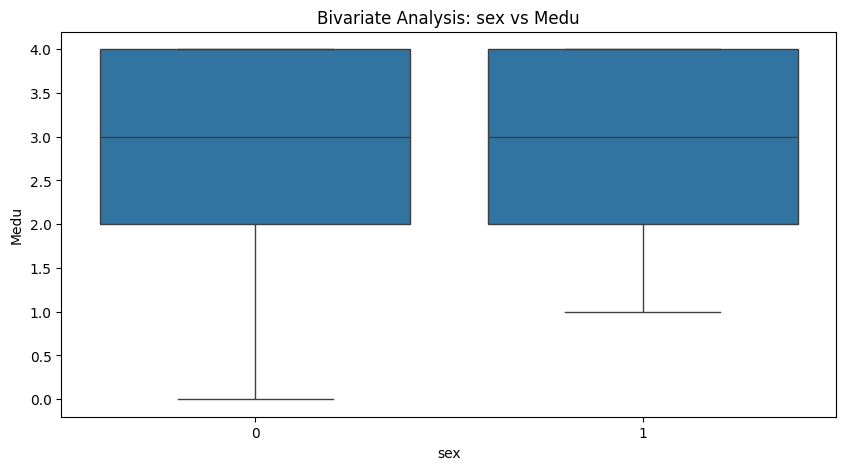

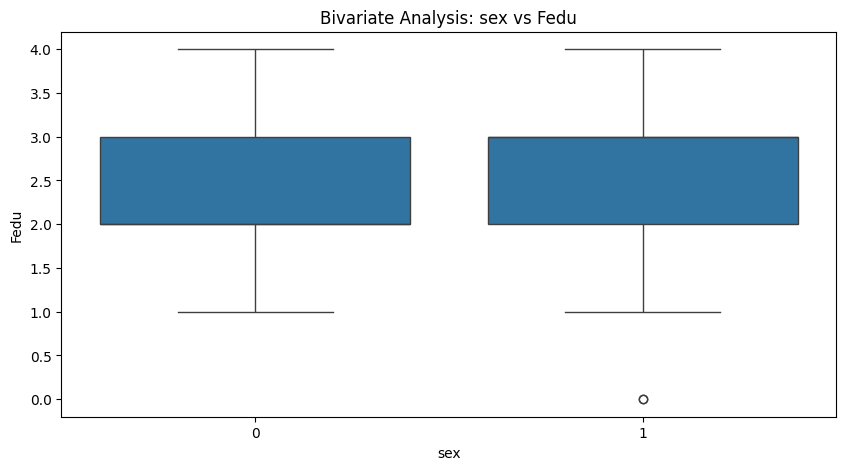

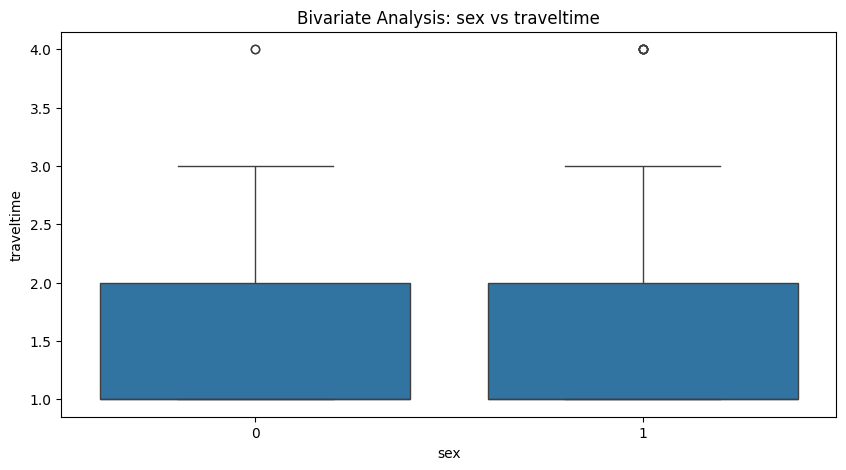

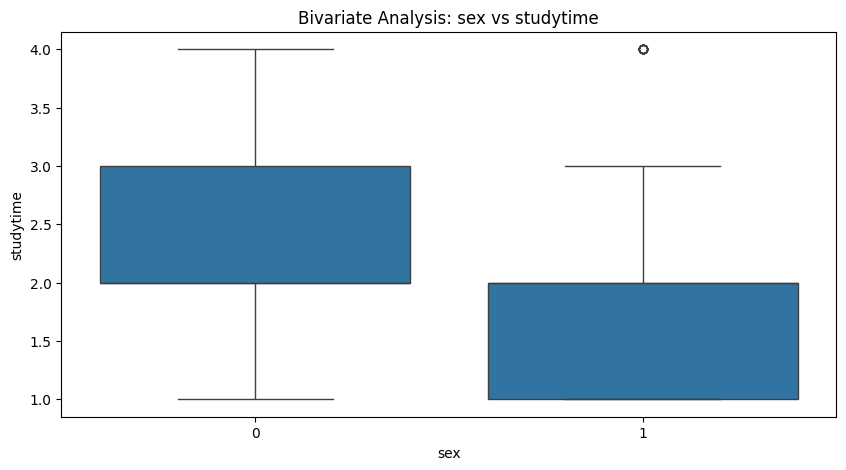

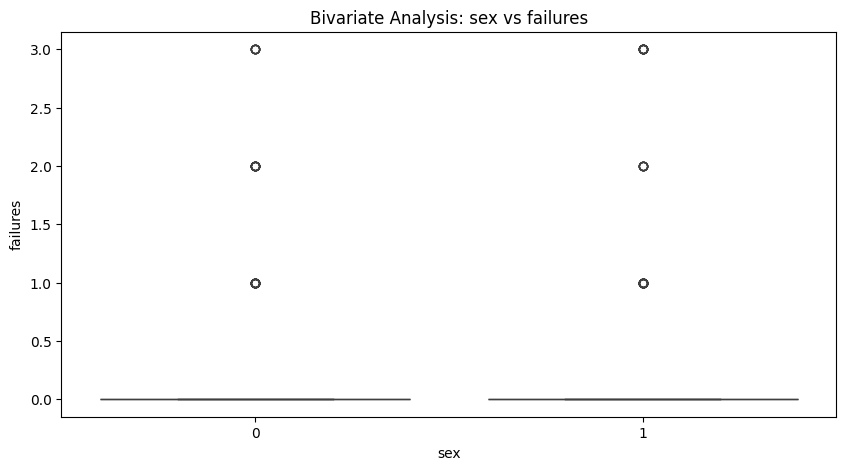

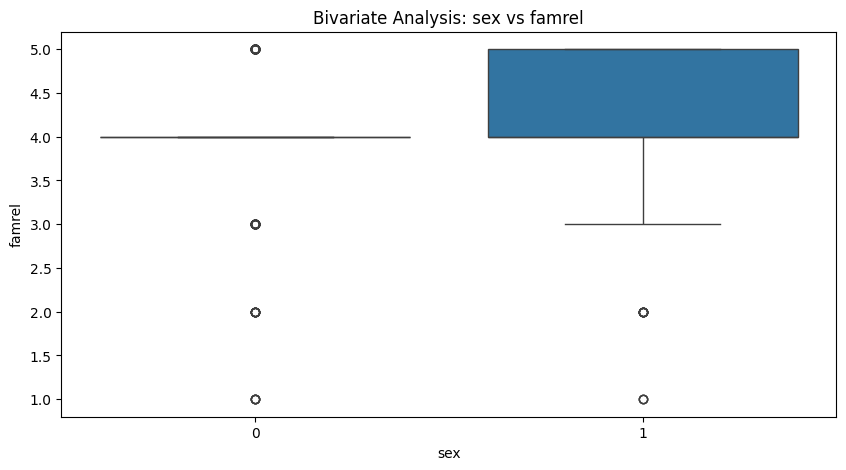

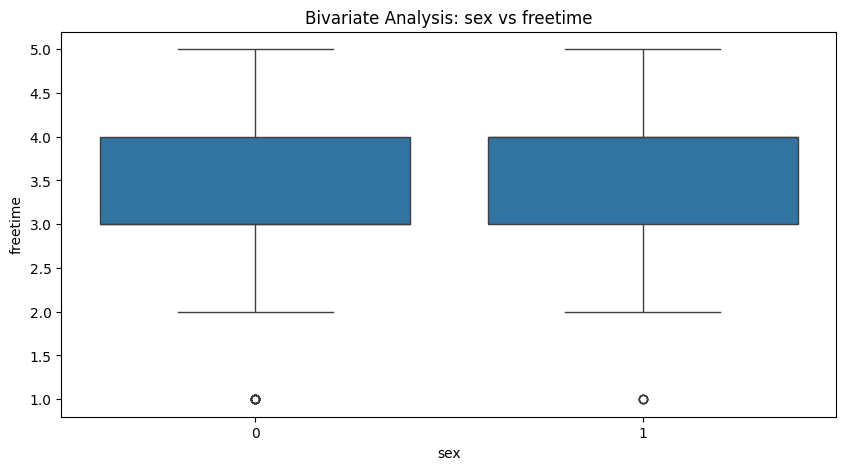

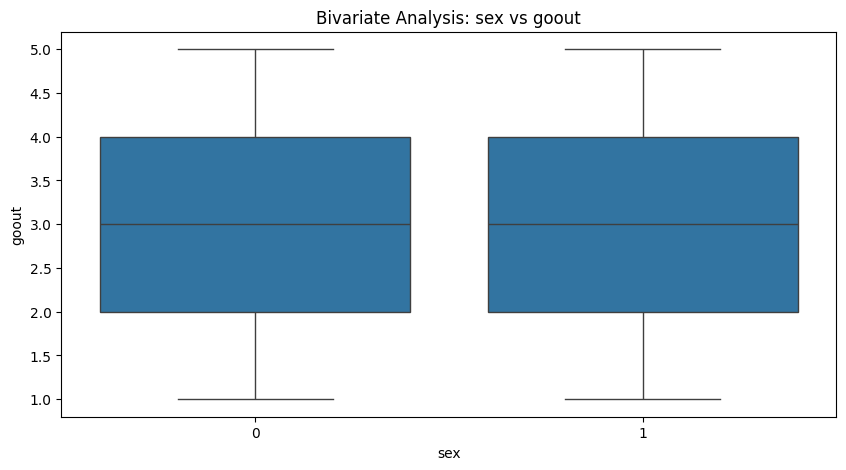

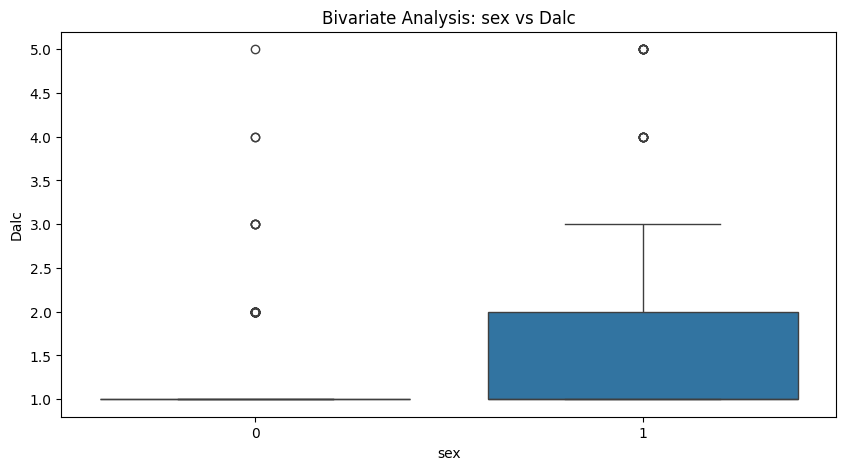

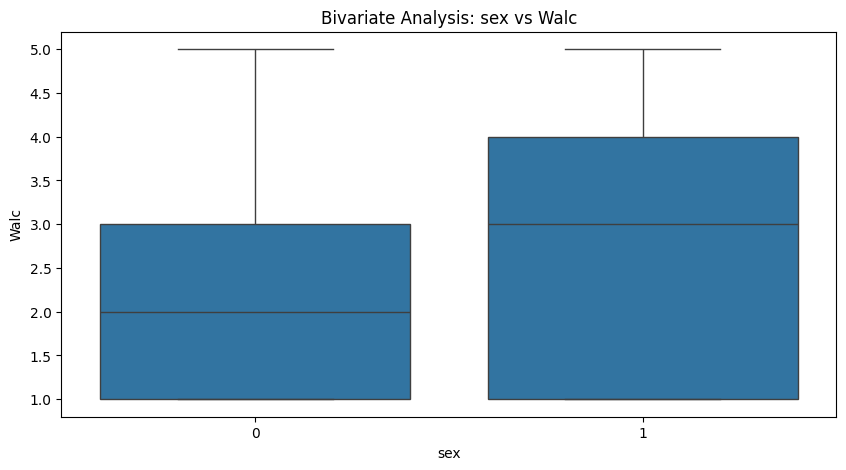

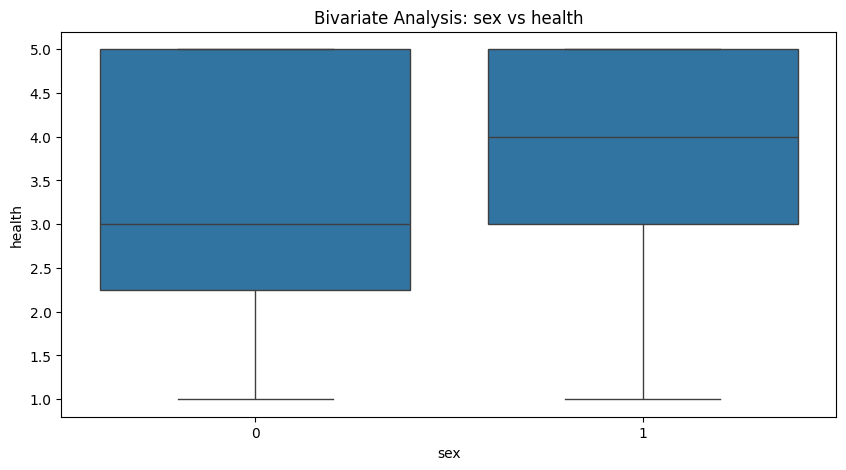

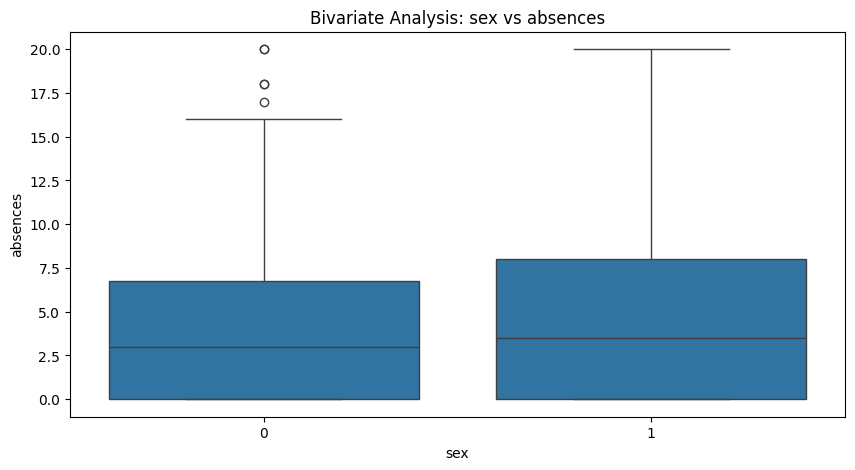

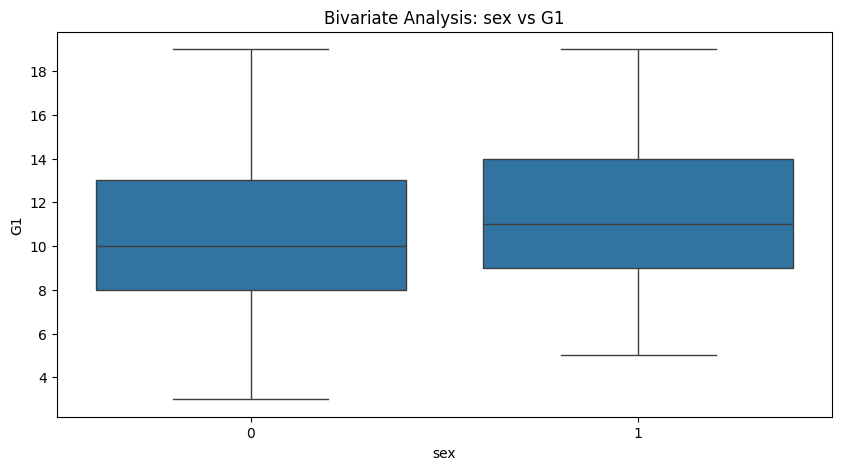

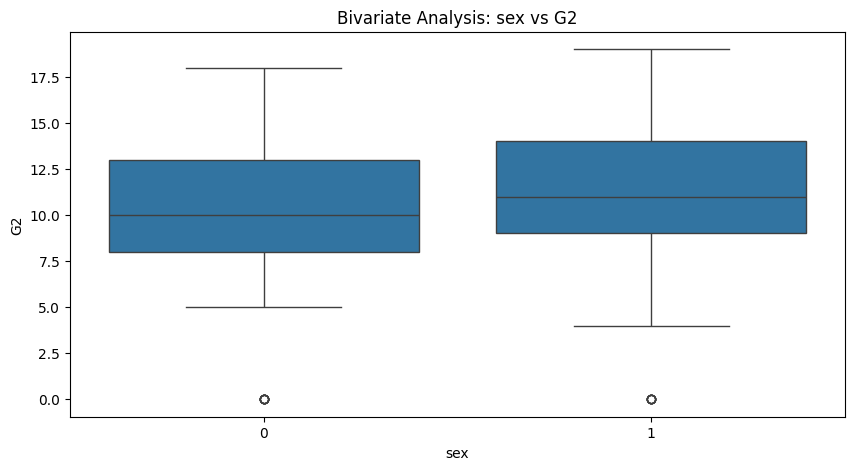

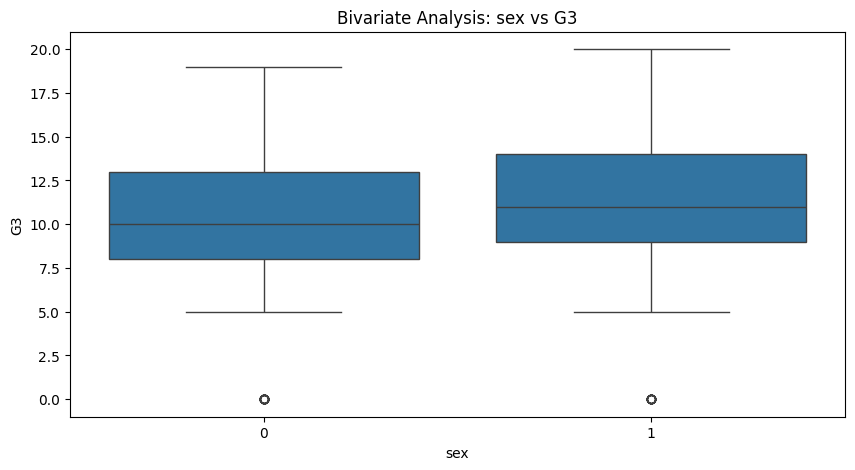

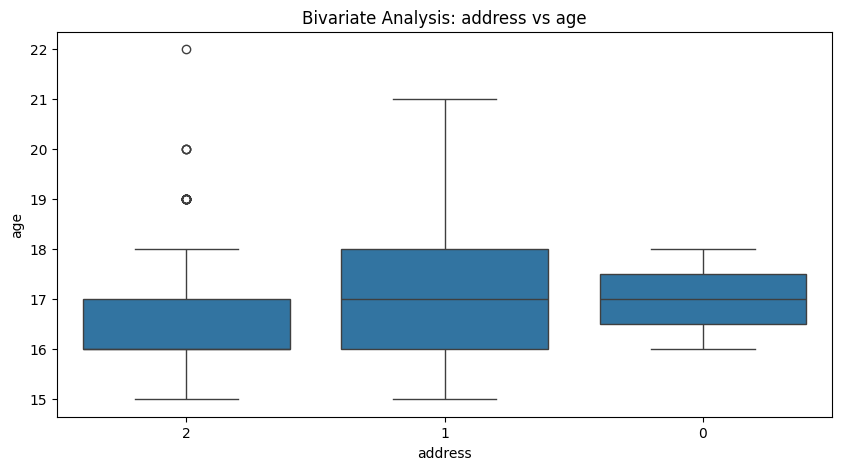

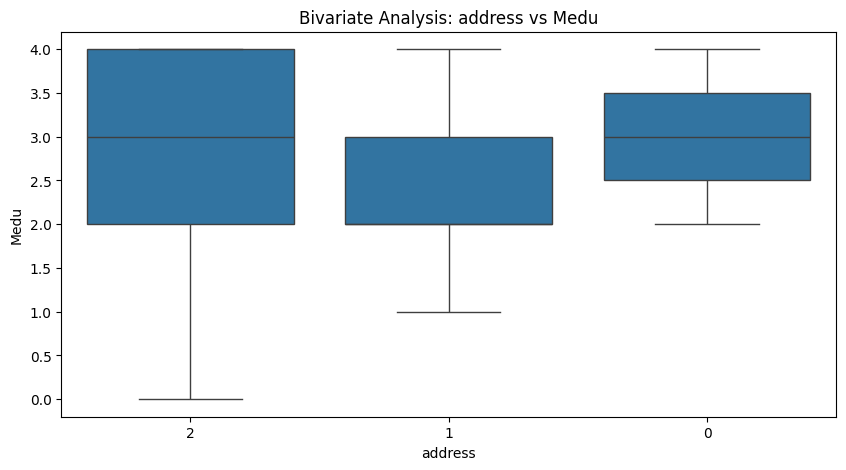

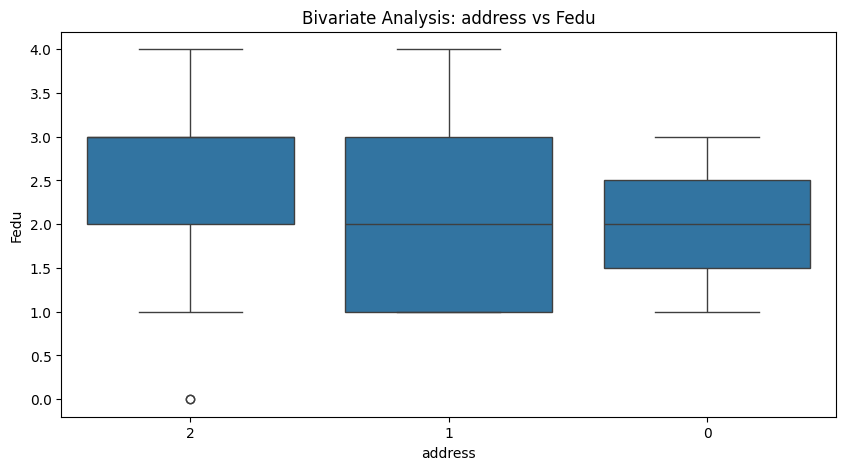

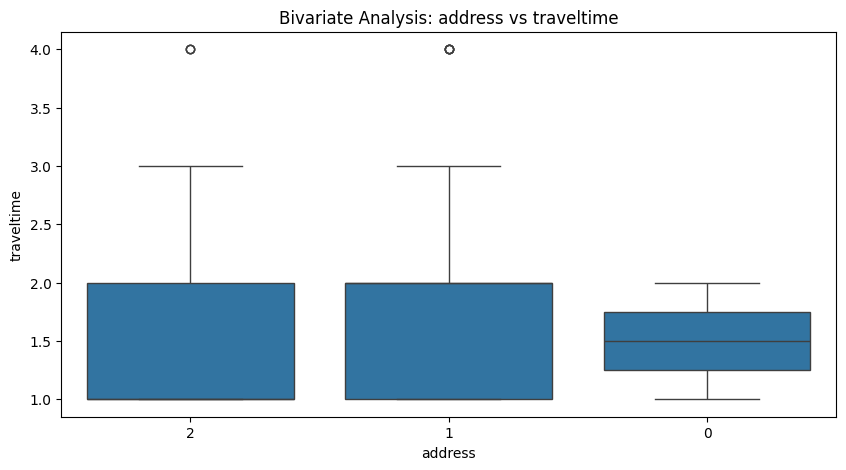

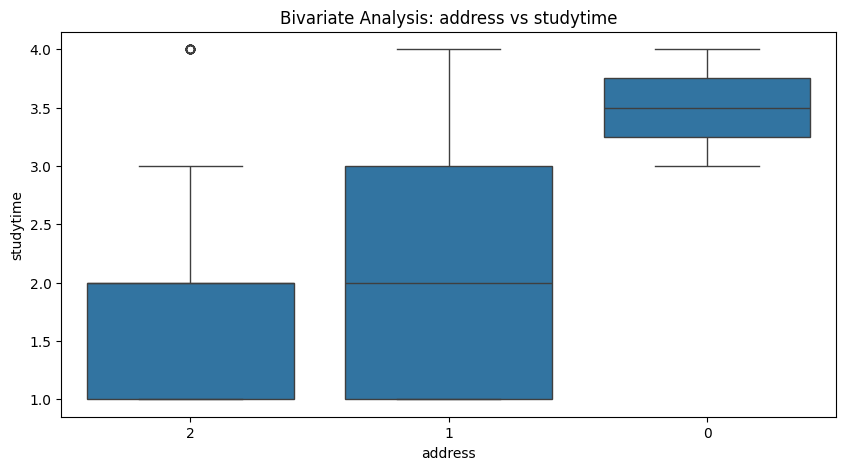

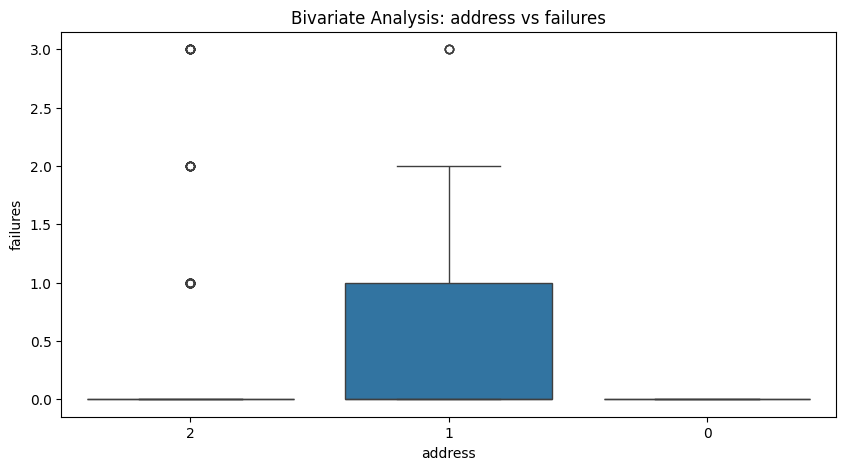

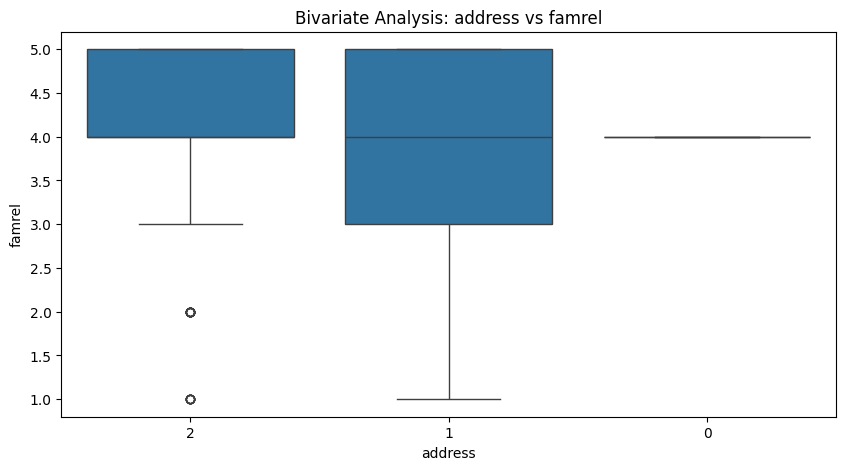

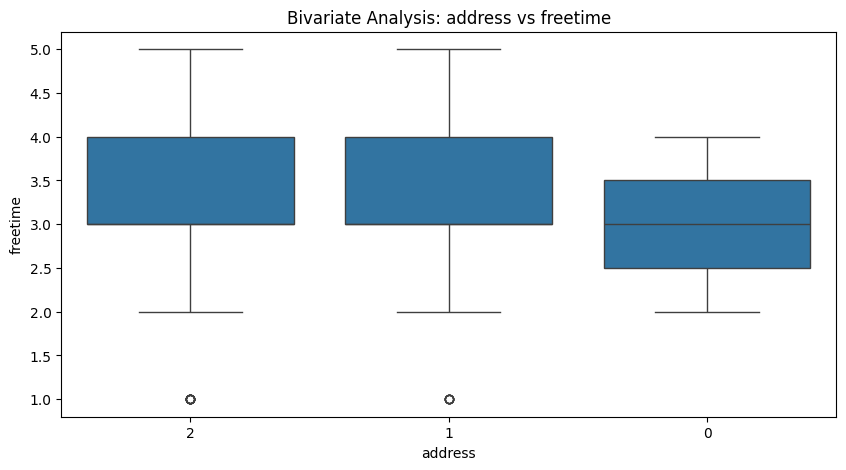

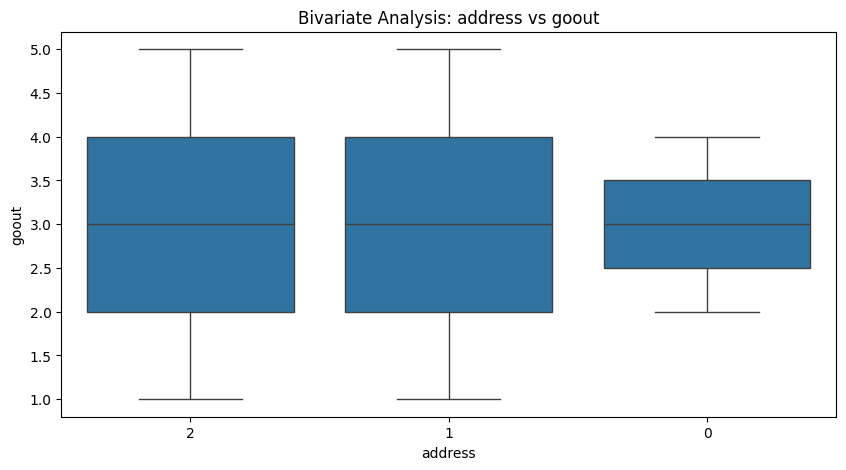

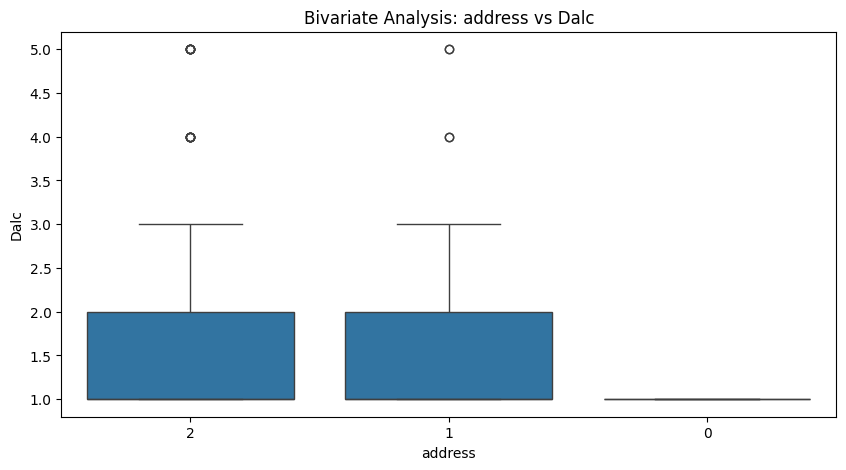

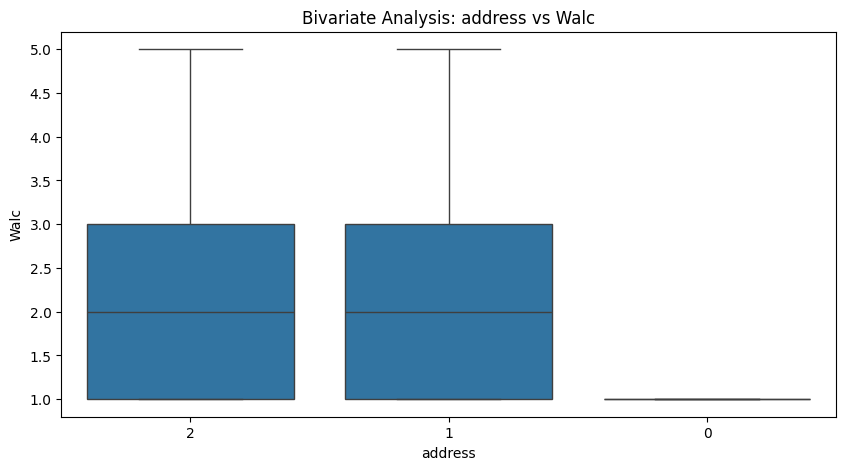

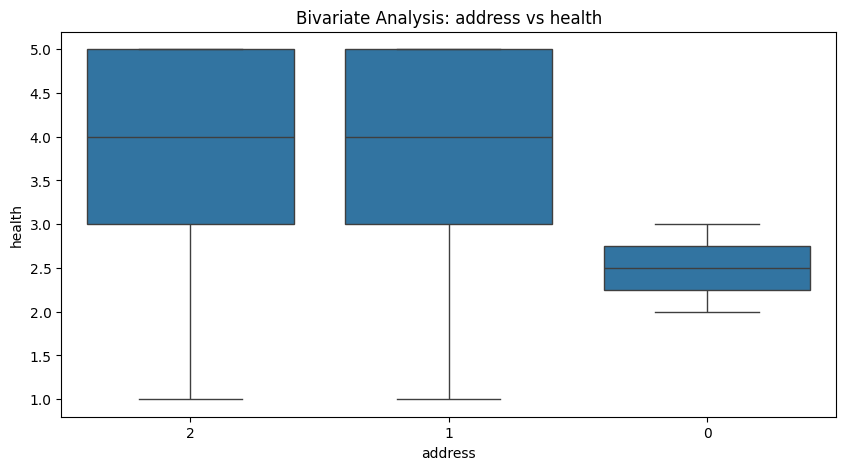

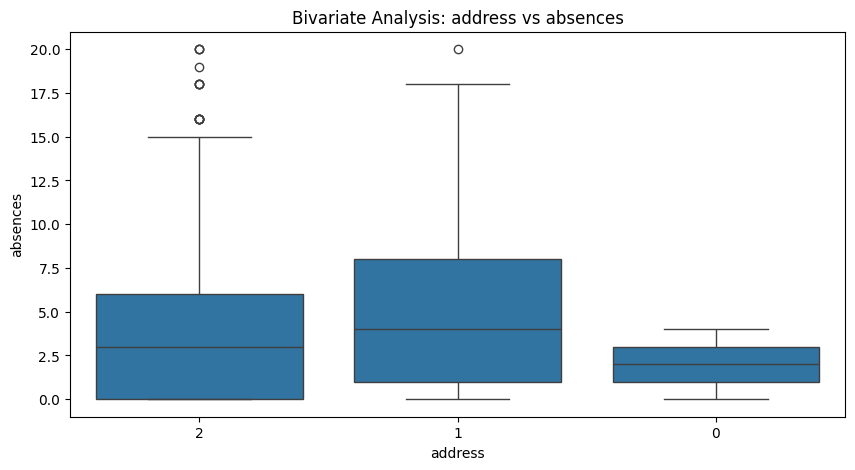

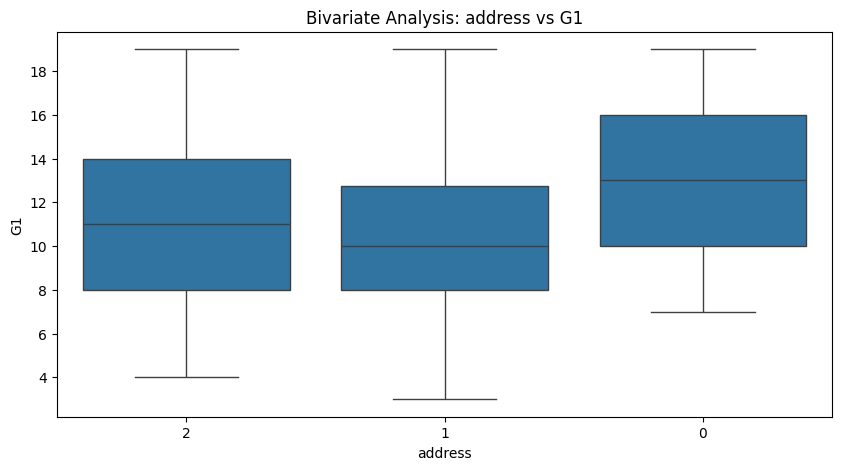

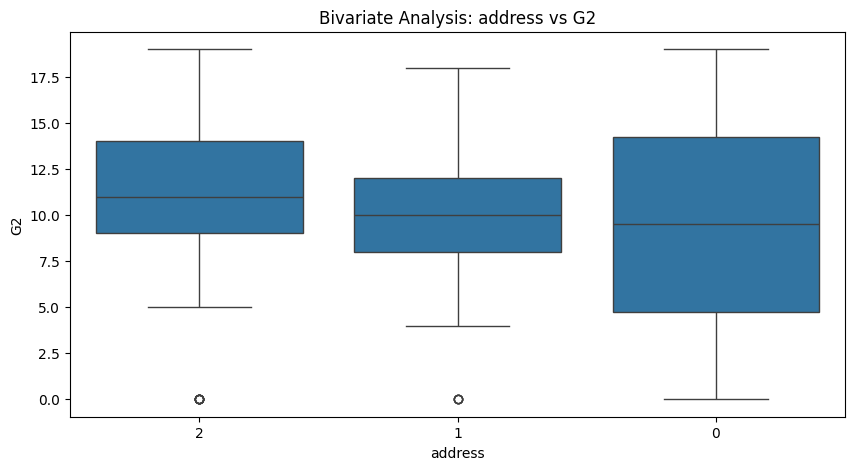

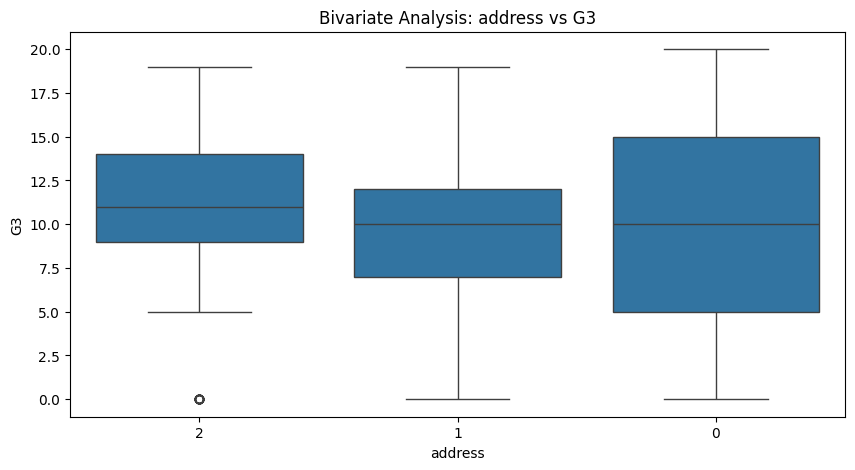

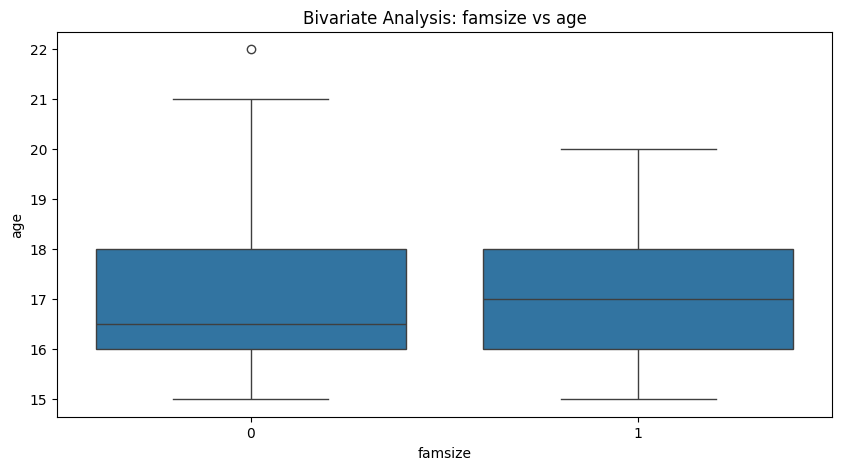

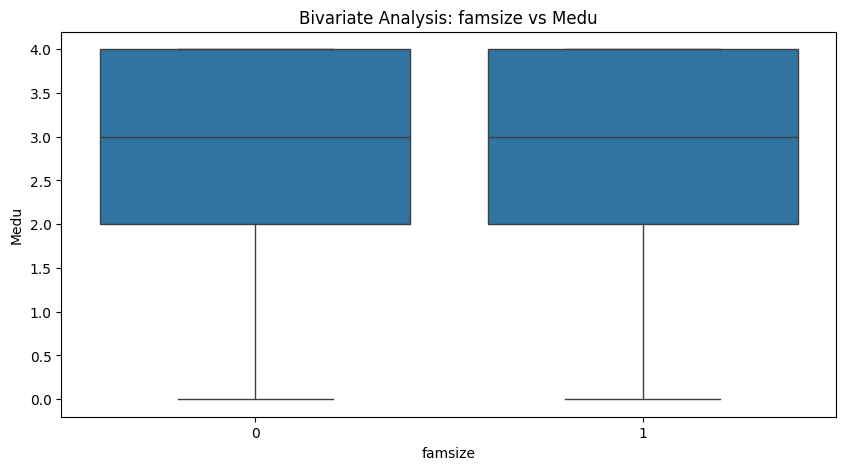

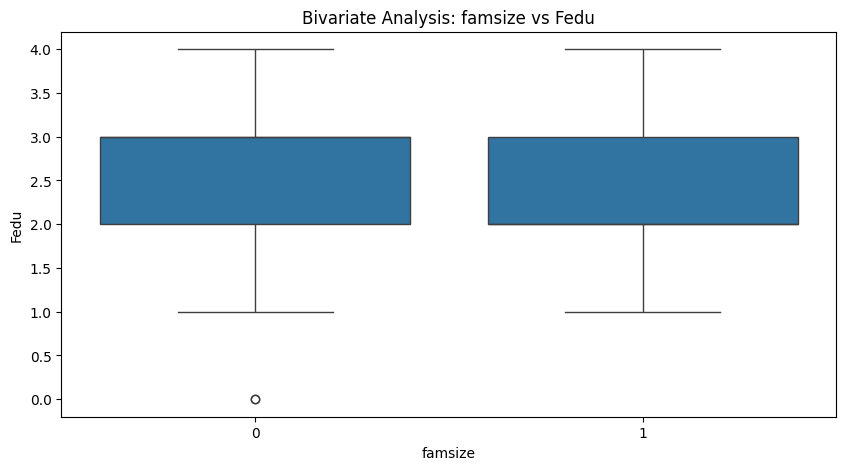

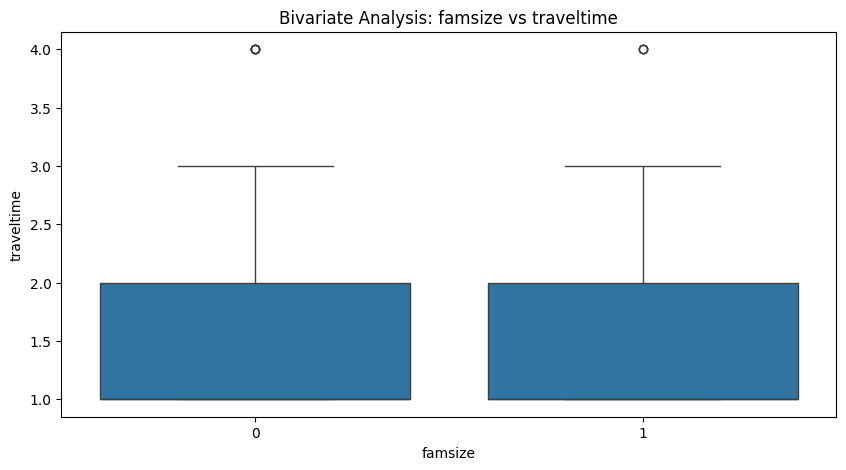

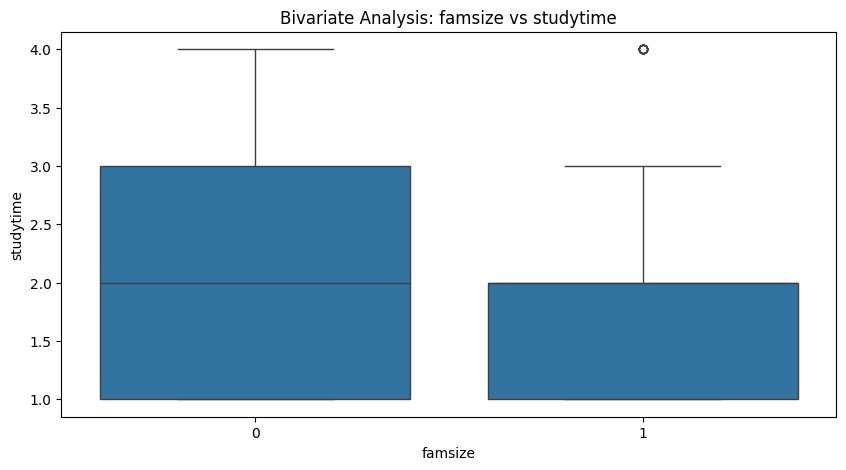

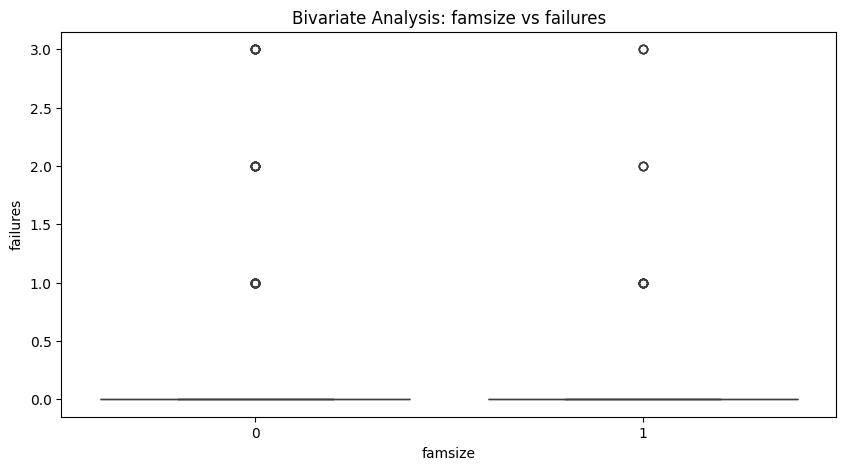

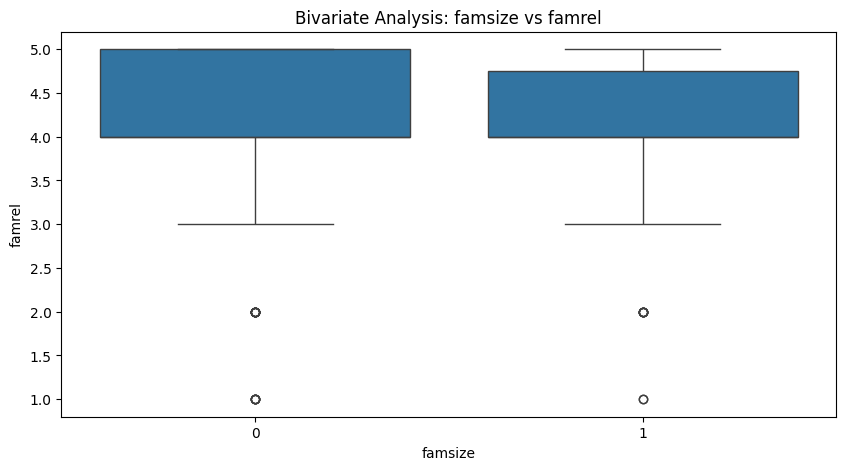

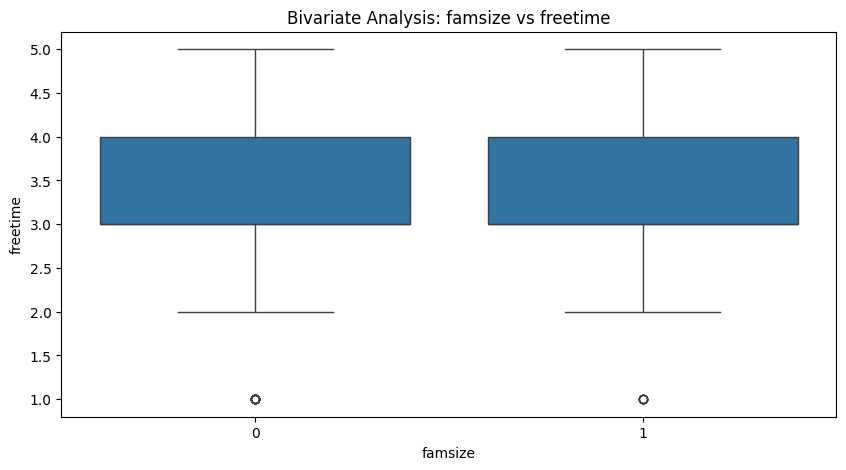

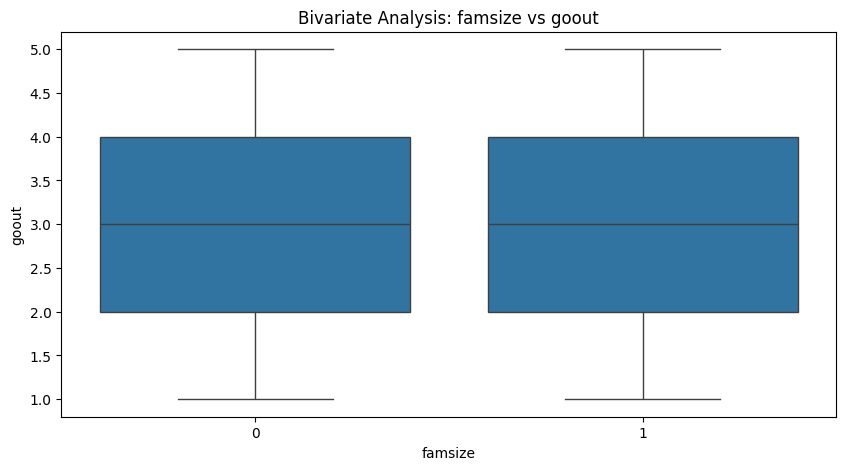

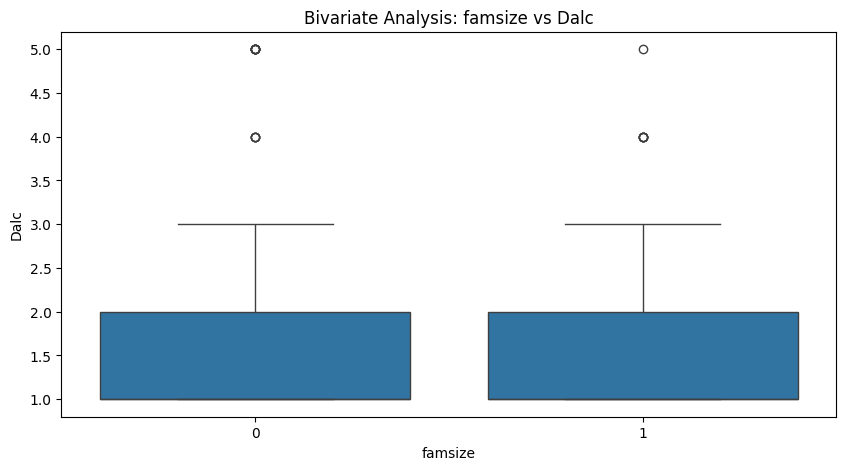

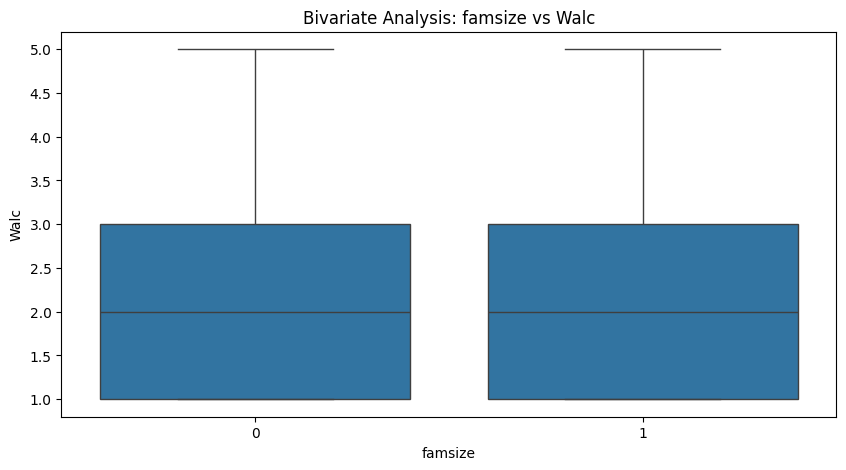

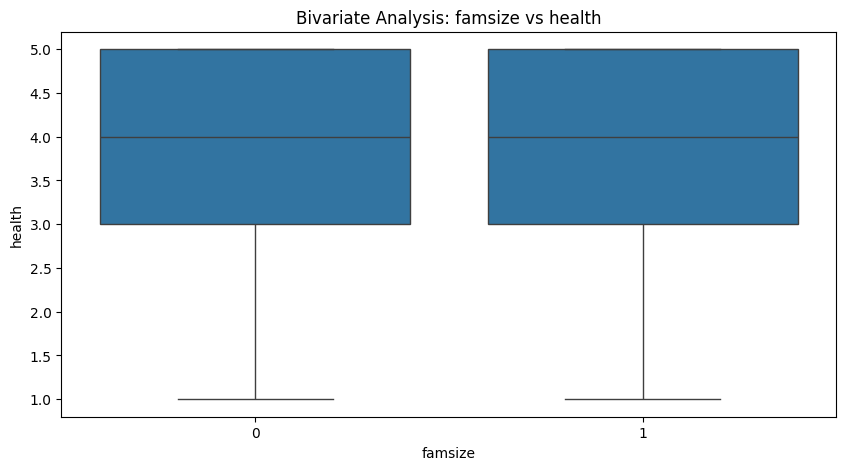

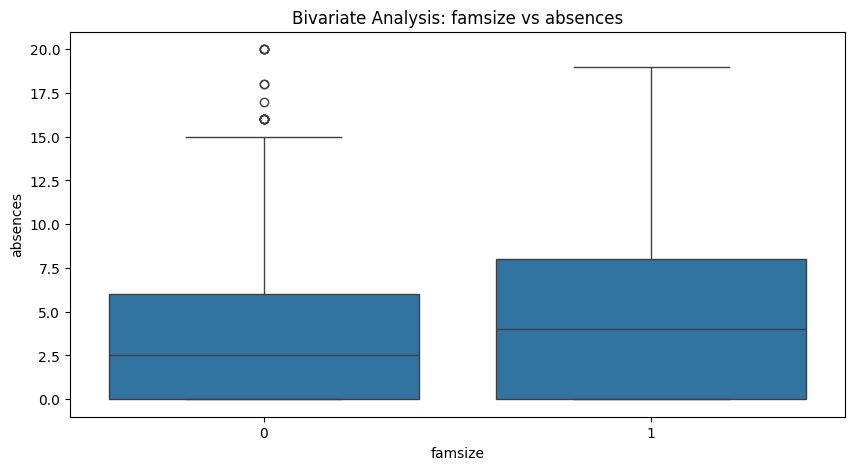

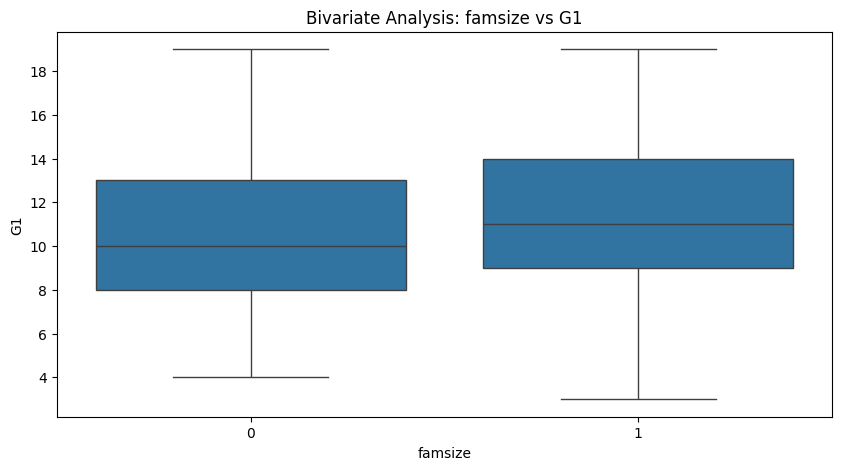

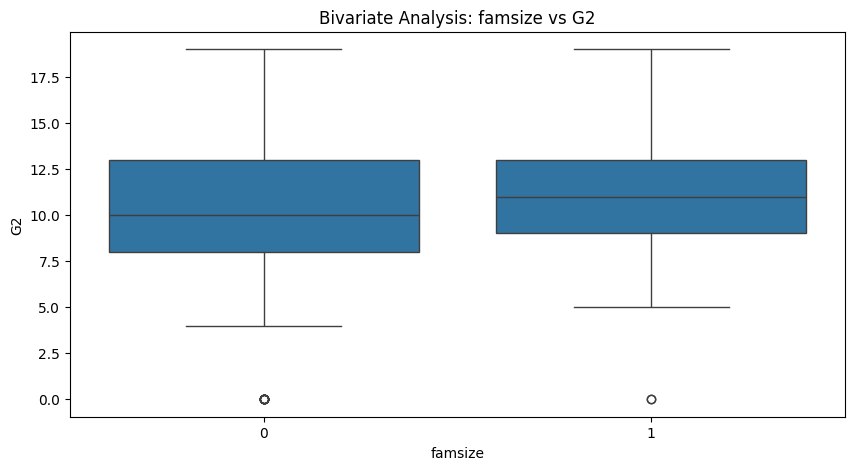

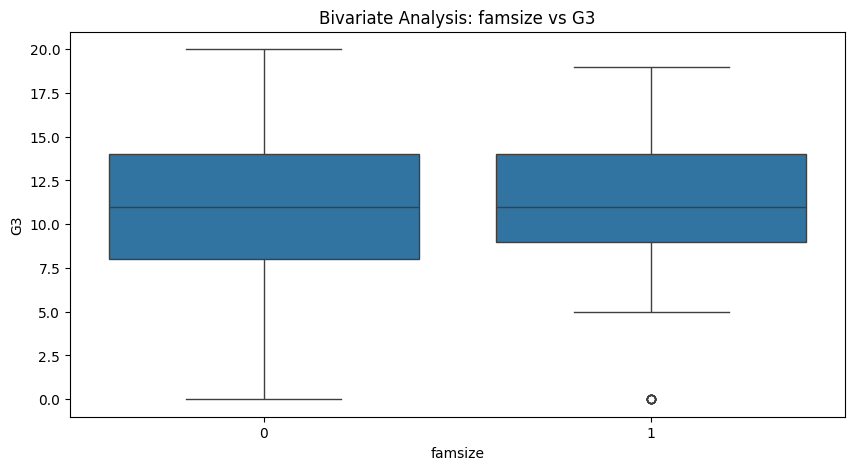

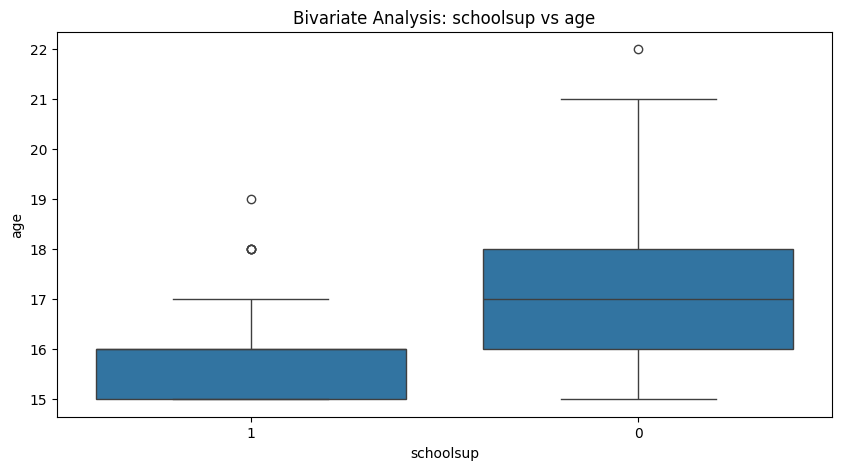

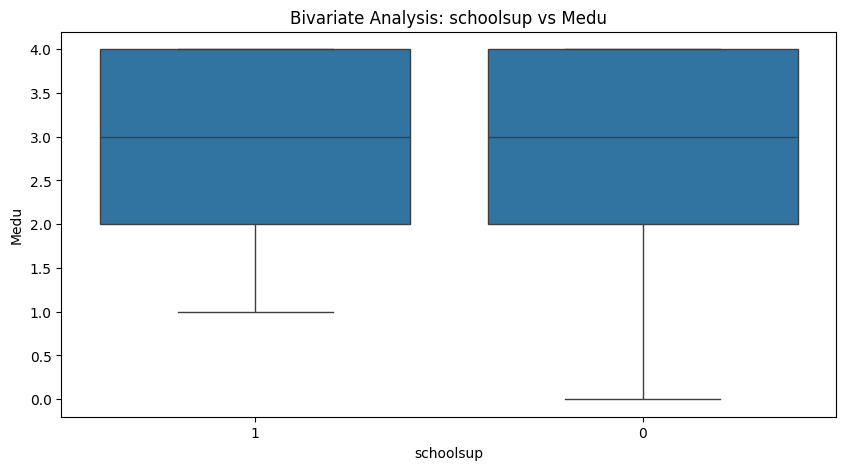

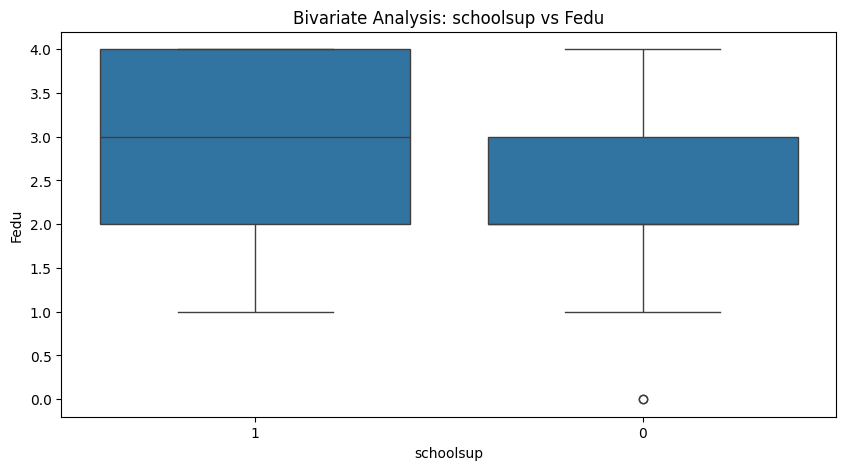

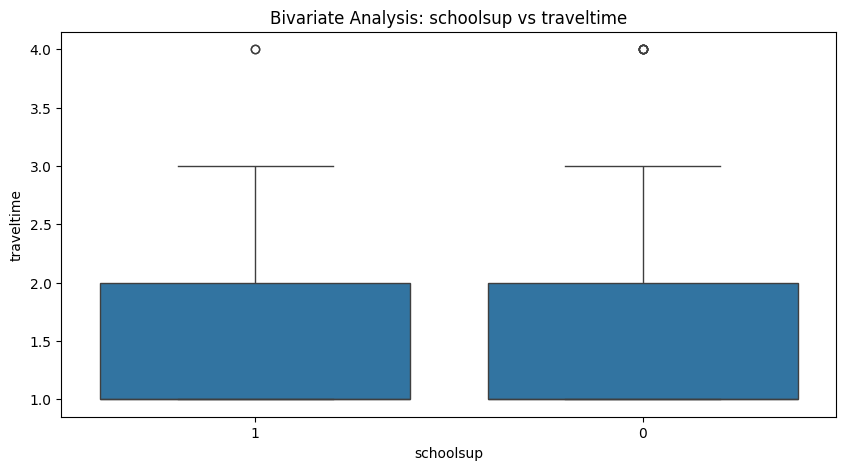

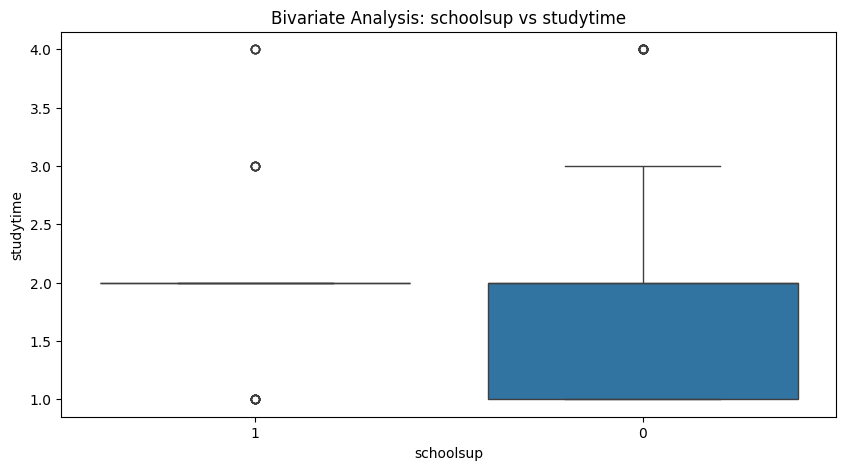

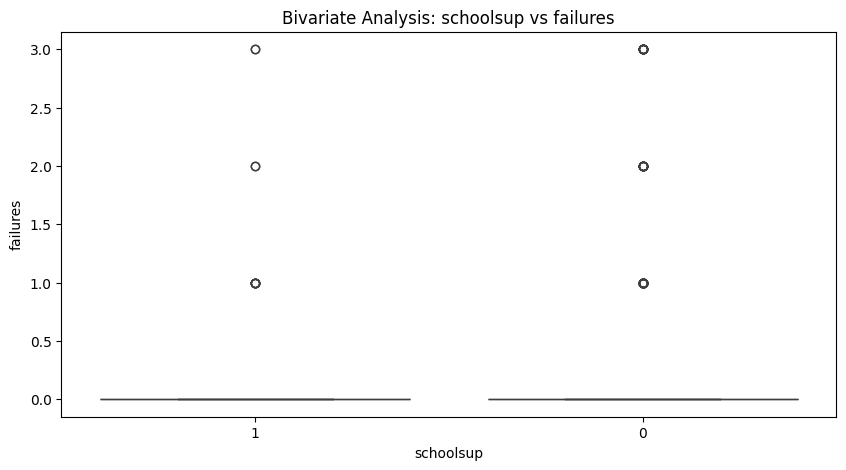

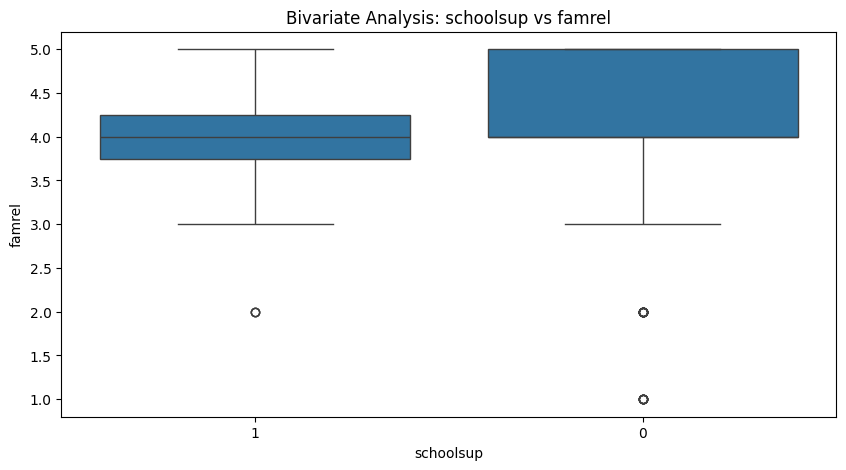

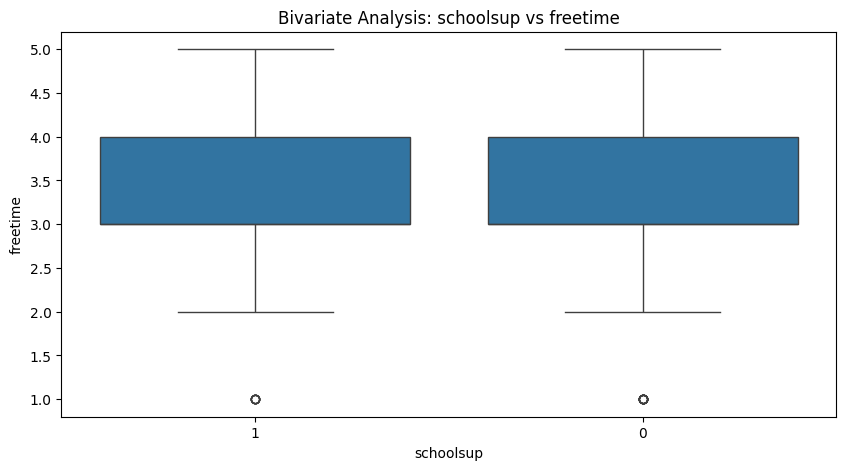

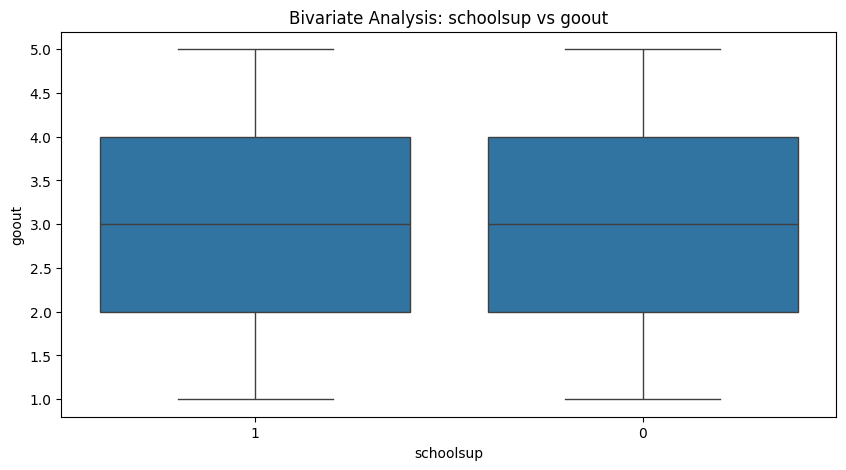

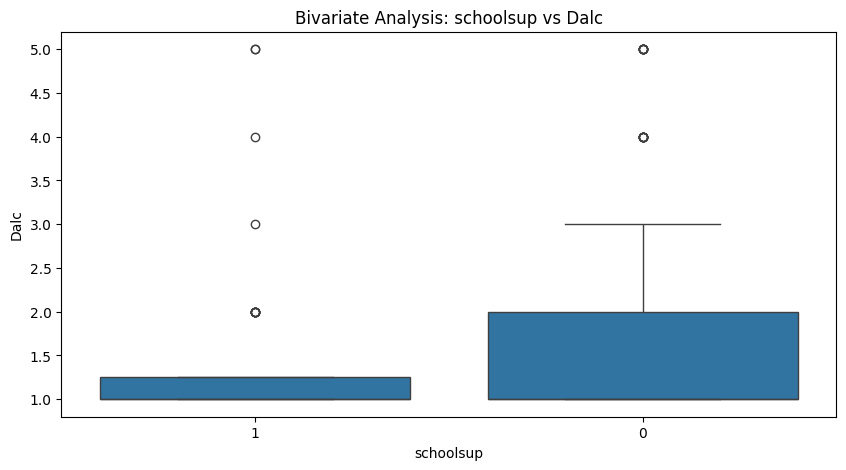

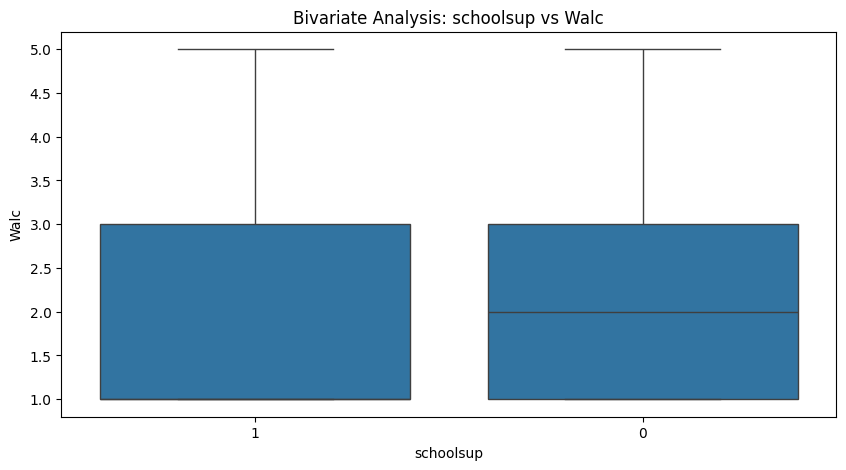

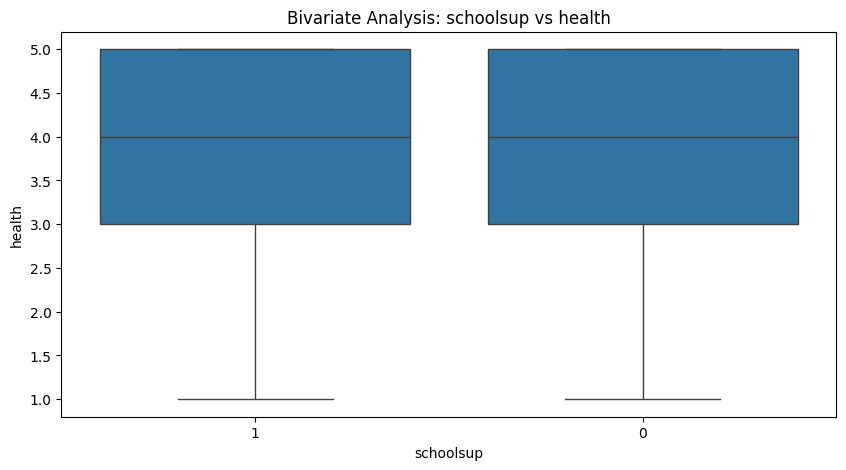

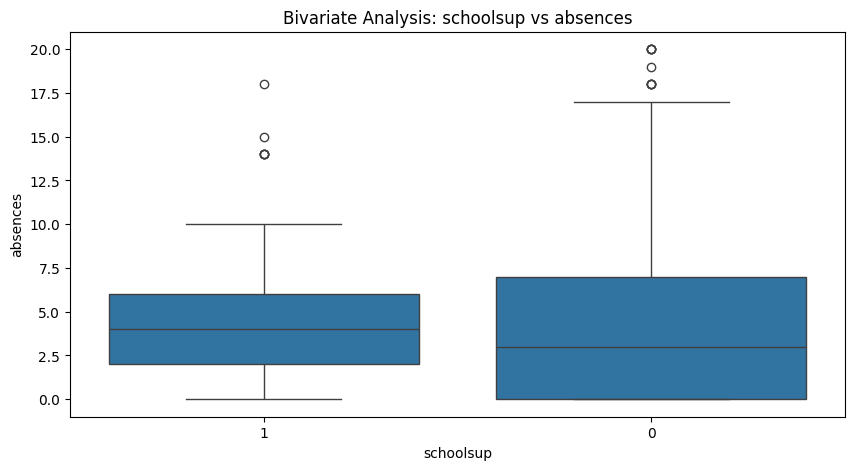

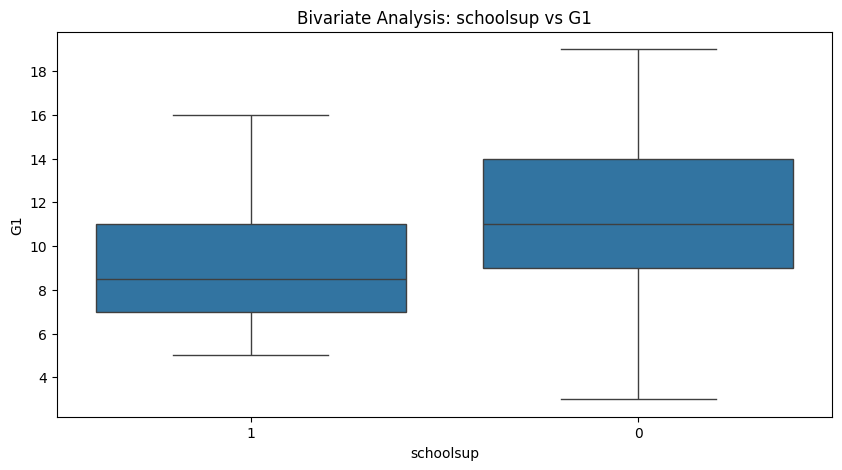

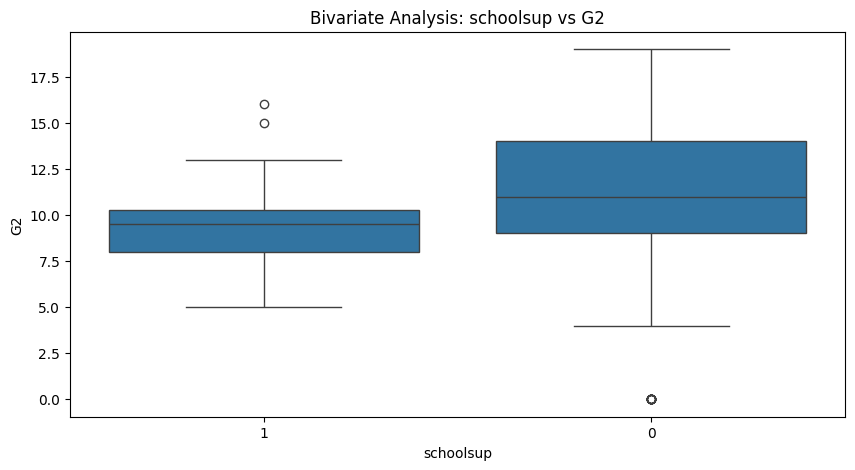

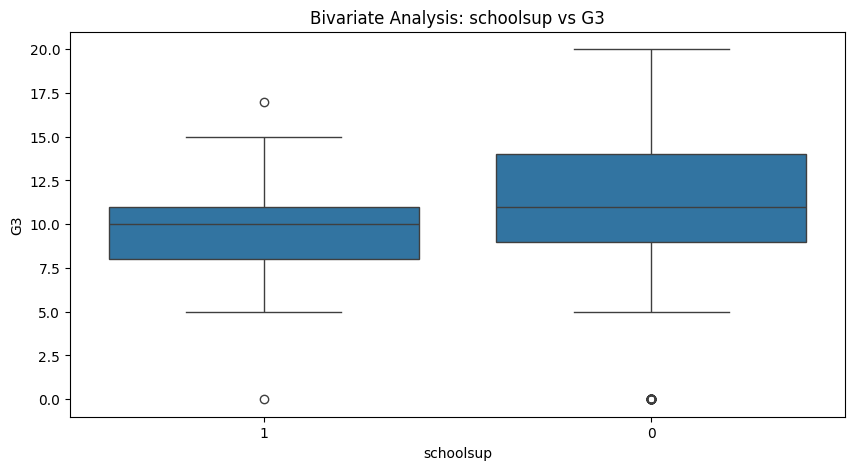

Column 'age_group' not found in DataFrame, skipping.


In [31]:
categorical_cols = ['sex', 'address', 'famsize', 'schoolsup', 'age_group']
for cat_col in categorical_cols:
    if cat_col in df.columns:
        for num_col in df.select_dtypes(include=['float64', 'int64']).columns:
            plt.figure(figsize=(10,5))
            sns.boxplot(x=df[cat_col].astype(str), y=df[num_col])
            plt.title(f'Bivariate Analysis: {cat_col} vs {num_col}')
            plt.show()
    else:
        print(f"Column '{cat_col}' not found in DataFrame, skipping.")


Multivariate Analysis

<Figure size 1200x600 with 0 Axes>

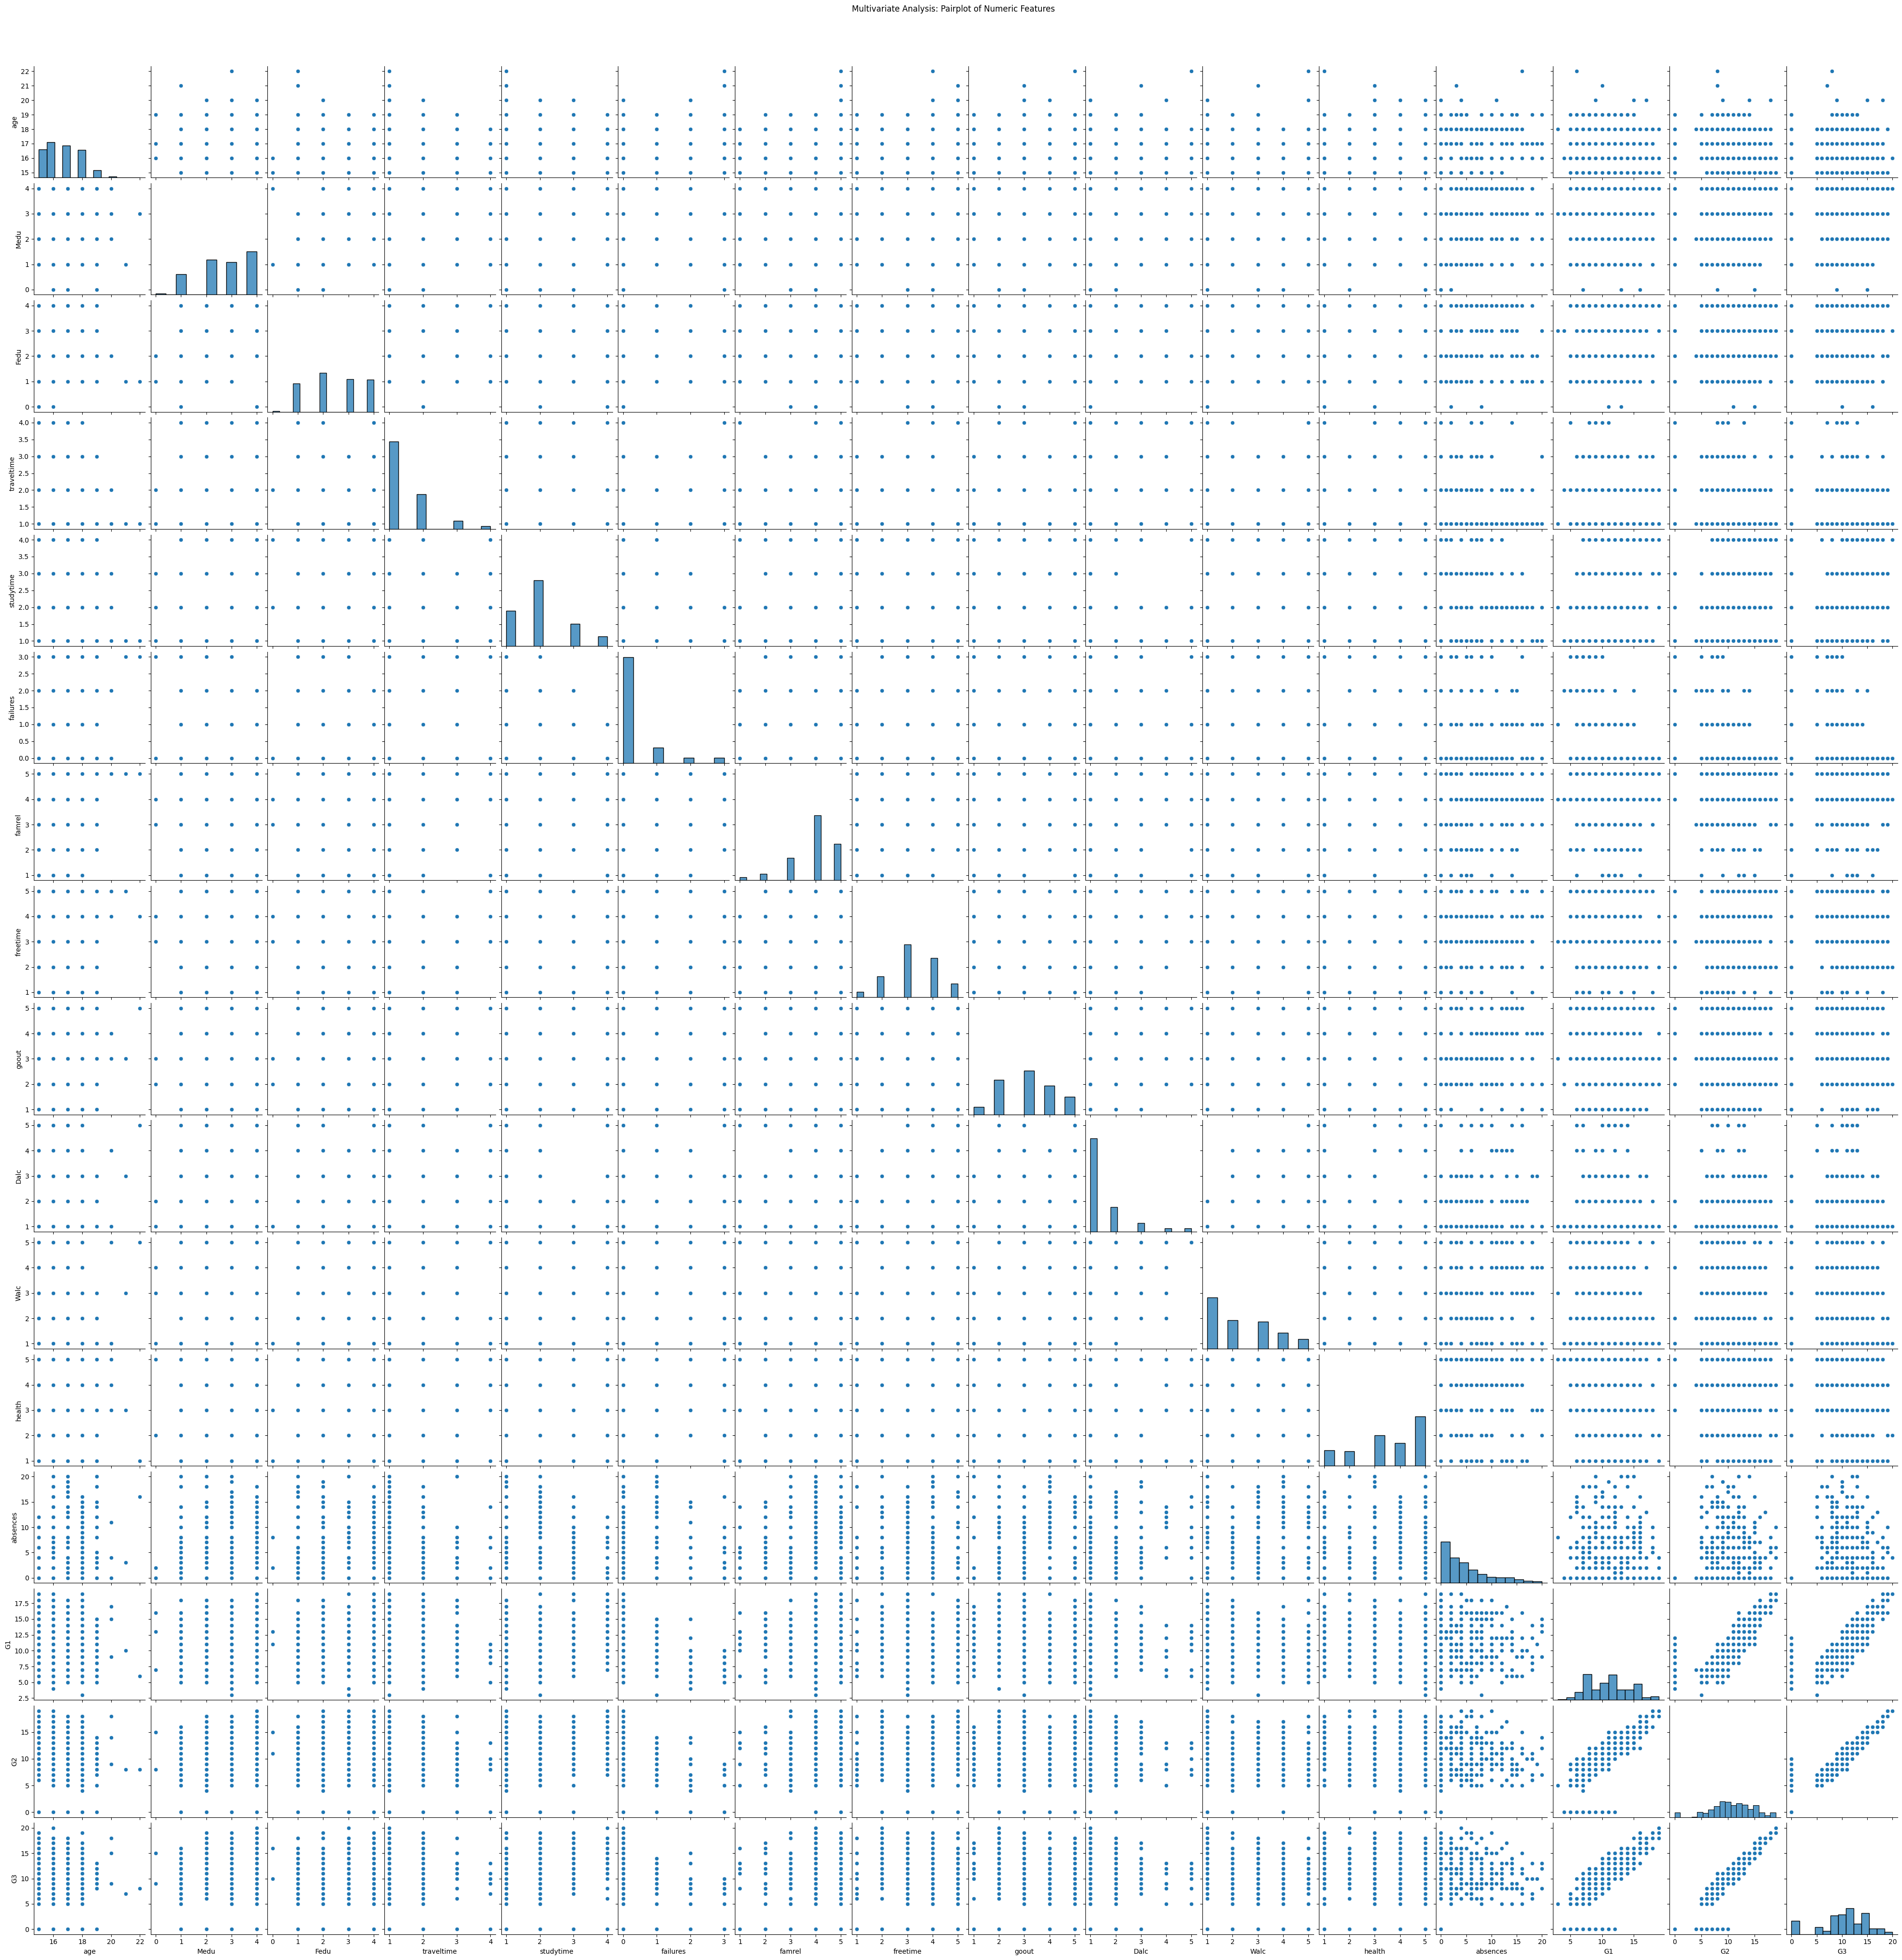

In [32]:
# Multivariate Analysis
plt.figure(figsize=(12,6))
sns.pairplot(df.select_dtypes(include=['float64', 'int64']))
plt.suptitle('Multivariate Analysis: Pairplot of Numeric Features', y=1.02)
plt.show()

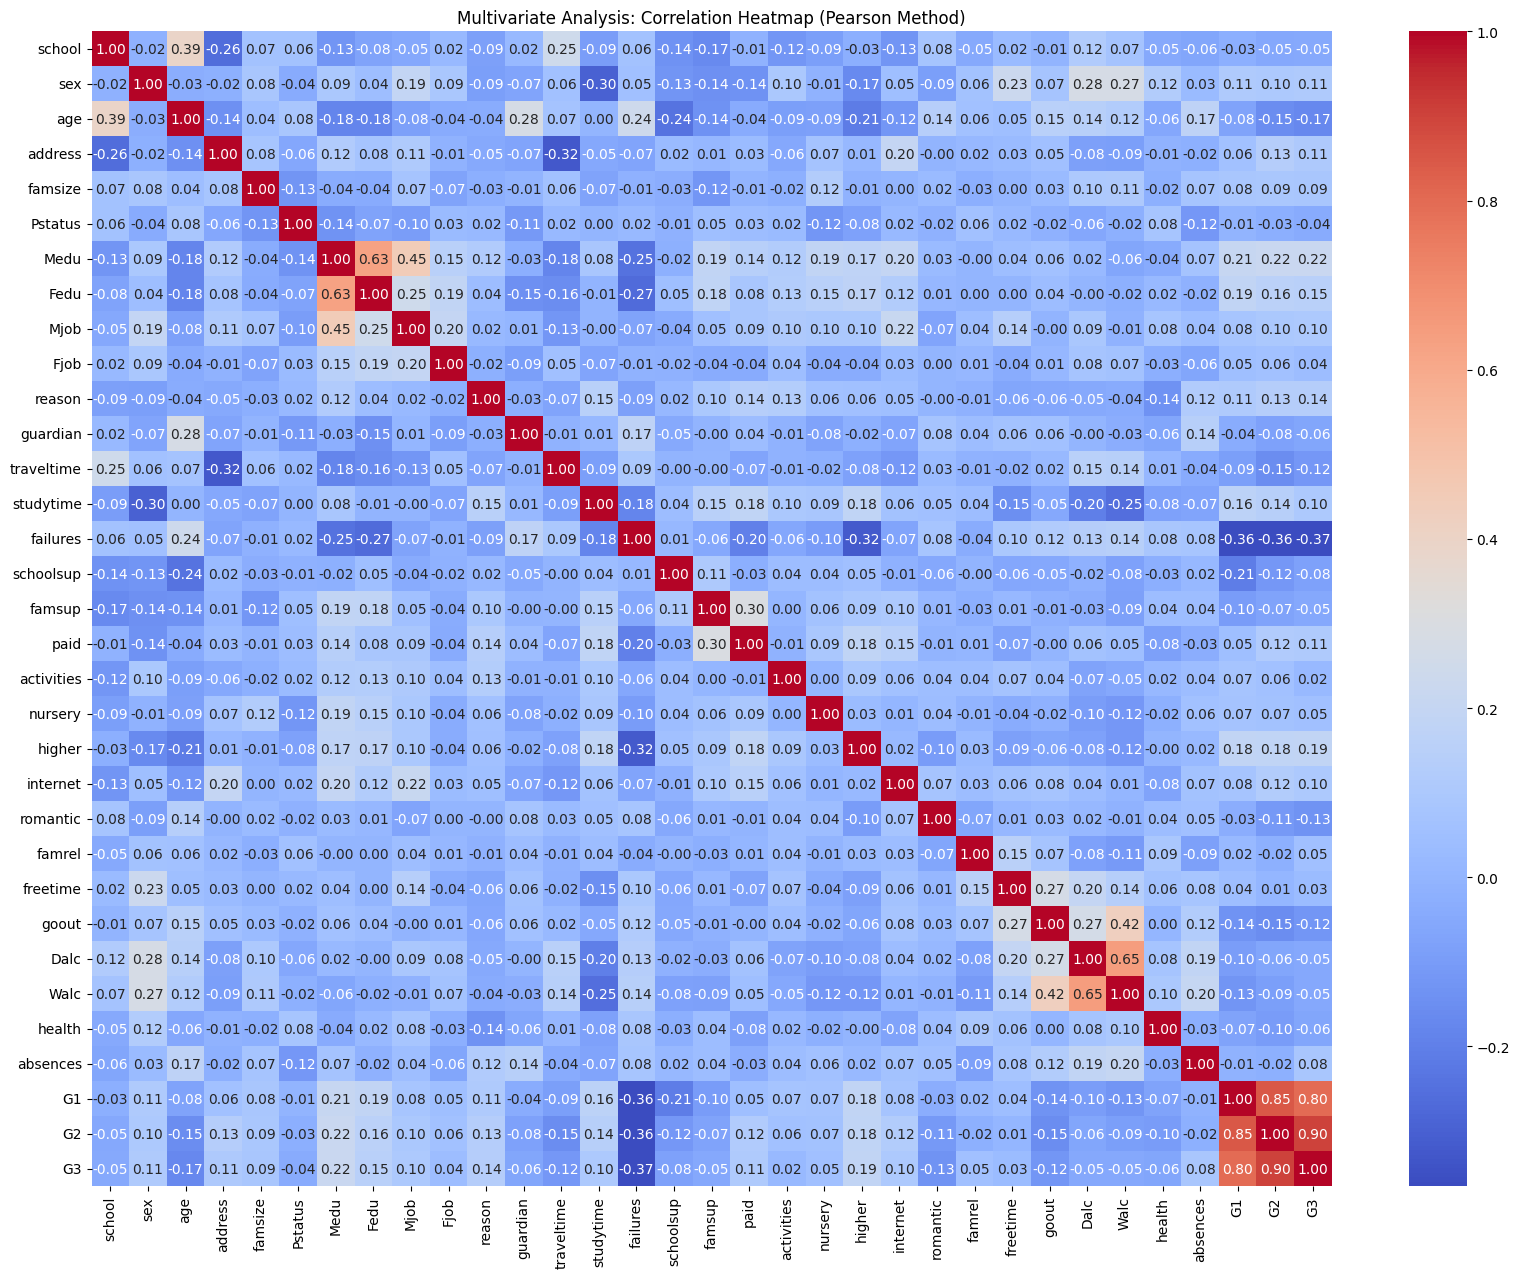

In [34]:
#Correlation Matrix with Heatmap using Pearson method
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(method='pearson'), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Multivariate Analysis: Correlation Heatmap (Pearson Method)')
plt.show()